In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats


In [2]:
df = pd.read_csv("Credit_score.csv")
df.shape

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_33791/2745516192.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Credit_score.csv")


(100000, 27)

In [3]:
pd.set_option('display.max_columns', None)
df.sample(10)

ID Customer_ID     Month                    Name Age          SSN   
45425  0x1202b  CUS_0x7955  February  Caroline Valetkevitchr  32  294-52-2292  \
66117  0x19967  CUS_0x2923      June            Aileen Wangw  19  489-56-6652   
15874   0x7304  CUS_0xa05d     March             Donny Kwokh  30  445-30-2049   
41411  0x108a5  CUS_0x62c3     April            Charlie Zhuk  46  960-26-5577   
63954  0x18cbc  CUS_0x1a9c     March               Richwinem  37  898-03-0260   
26212   0xaf96  CUS_0x4d25       May                Stempelj  35  303-85-3647   
70857  0x1b52f  CUS_0x1b55  February       Matthew Robinsonp  41  468-81-7192   
41074  0x106ac  CUS_0x194f     March         Rodrigo Camposw  43  254-39-4934   
28266   0xbba0  CUS_0x2358     March           Nate Raymondw  40  914-64-8225   
74465  0x1ca53  CUS_0xbc40  February                 Watersu  25  507-87-3579   

         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts   
45425  Entrepreneur      42250.77            3363.897500                  0  \
66117  Entrepreneur      8637.875             614.822917                  9   
15874     Scientist     177546.36           14813.530000                  5   
41411  Entrepreneur     17132.905            1283.742083                  1   
63954        Writer         17971                    NaN                  7   
26212      Engineer     118845.76            9877.813333                  0   
70857        Lawyer       67672.4            5878.366667                  8   
41074       _______      29503.65            2309.637500                  5   
28266      Musician      35760.12            2904.010000                  8   
74465      Musician      77856.36            6260.163930                 10   

       Num_Credit_Card  Interest_Rate Num_of_Loan   
45425                4              3           0  \
66117               10             20           5   
15874                1              5           0   
41411                5              5           2   
63954                3              7           3   
26212                7             10           0   
70857                5             27           5   
41074                5             14           3   
28266                8             33           6   
74465                6             22           8   

                                            Type_of_Loan  Delay_from_due_date   
45425                                                NaN                   14  \
66117  Payday Loan, Auto Loan, Personal Loan, Mortgag...                   25   
15874                                                NaN                    3   
41411             Personal Loan, and Credit-Builder Loan                    4   
63954  Not Specified, Mortgage Loan, and Debt Consoli...                   24   
26212                                                NaN                    5   
70857  Auto Loan, Payday Loan, Personal Loan, Auto Lo...                   30   
41074  Not Specified, Home Equity Loan, and Credit-Bu...                    5   
28266  Personal Loan, Personal Loan, Home Equity Loan...                   19   
74465  Mortgage Loan, Payday Loan, Home Equity Loan, ...                   56   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries   
45425                     -2                 9.69                   0.0  \
66117                     22                12.63                   8.0   
15874                      6                  7.3                   1.0   
41411                      3                 2.16                   0.0   
63954                     13                11.09                   1.0   
26212                      6                 9.38                   NaN   
70857                     26                  0.5                  10.0   
41074                    NaN                 4.09                   NaN   
28266                     16                 6.61                  11.0   
74465                   

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
def unique_value(df):
    cat_cols = ['Occupation', 'Type_of_Loan', 'Num_of_Loan', 'Payment_Behaviour', 'Credit_Mix', 'Payment_of_Min_Amount']
    for col in cat_cols:
        print(f"column name: {col}, no of unique values : {df[col].nunique()}")
        print(df[col].unique())
        print("*"*50)
        print()

unique_value(df)

column name: Occupation, no of unique values : 16
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
**************************************************

column name: Type_of_Loan, no of unique values : 6260
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
**************************************************

column name: Num_of_Loan, no of unique values : 434
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' 

In [8]:
def min_max_value(df: pd.DataFrame):
    col_to_kept = []
    # Ensure the column names are stripped of leading/trailing spaces
    df.columns = df.columns.str.strip()
    
    # Get only numeric columns (float64 and int64)
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in num_cols:
        try:
            # Check min and max values for the column
            min_value = df[col].min()
            max_value = df[col].max()
            
            # If min and max are the same, drop the column
            if min_value == max_value:
                df.drop(columns=col, axis=1, inplace=True)
            else:
                col_to_kept.append(col)
                print(f"Column: {col}, minimum value: {min_value}, maximum value: {max_value}")
                print("*" * 50)
                print()
        except KeyError:
            print(f"Column '{col}' not found in the DataFrame.")
    
    return df.shape, df.columns

# Example usage:
min_max_value(df)


Column: Monthly_Inhand_Salary, minimum value: 303.6454167, maximum value: 15204.63333
**************************************************

Column: Num_Bank_Accounts, minimum value: -1, maximum value: 1798
**************************************************

Column: Num_Credit_Card, minimum value: 0, maximum value: 1499
**************************************************

Column: Interest_Rate, minimum value: 1, maximum value: 5797
**************************************************

Column: Delay_from_due_date, minimum value: -5, maximum value: 67
**************************************************

Column: Num_Credit_Inquiries, minimum value: 0.0, maximum value: 2597.0
**************************************************

Column: Credit_Utilization_Ratio, minimum value: 20.0, maximum value: 50.0
**************************************************

Column: Total_EMI_per_month, minimum value: 0.0, maximum value: 82331.0
**************************************************



((100000, 27),
 Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
        'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
        'Credit_Utilization_Ratio', 'Credit_History_Age',
        'Payment_of_Min_Amount', 'Total_EMI_per_month',
        'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
       dtype='object'))

In [9]:
# numerical_features = df.select_dtypes(include=['float64', 'int64'])
# for col in numerical_features:
#     plt.figure(figsize=(15,7))
#     sns.histplot(data=df, x=col, kde=True, hue='Payment_of_Min_Amount')
#     plt.tight_layout()
#     plt.show()

In [10]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

In [11]:
float_cols = ['Age', 'Num_of_Loan', 'Annual_Income', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
def to_float(cols):
    for col in cols:
        df[col] = df[col].str.split("_", expand=True)[0].values
        df[col] = df[col].replace({"":np.nan})
        df[col] = df[col].astype('float')

to_float(cols=float_cols)

In [12]:
# def to_int(cols):
#     for col in cols:
#         df[col] = df[col].str.split("_", expand=True)[0].values
#         df[col] = df[col].astype('int')

# to_int(cols=int_cols)

In [13]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.replace(pat=" Years ", repl="")
df['Credit_History_Age'] = df['Credit_History_Age'].str.replace(pat=" Months", repl="")
df['Credit_History_Age'] = df['Credit_History_Age'].str.replace(pat="and ", repl=".")
df["Credit_History_Age"] = df['Credit_History_Age'].astype("float")


In [14]:
df[['Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance']].sample(20)

Occupation  Annual_Income  Monthly_Inhand_Salary  Monthly_Balance
98457        Writer       38856.53            3337.044167              NaN
5974     Accountant       21546.93            1561.577500       378.822317
64476       _______       75436.72            6052.393333       464.490753
80848        Doctor       28337.76            2132.480000       413.354674
38872      Engineer       14688.84                    NaN       324.953978
90688       _______       63824.07            5383.672500       261.035570
62746     Scientist       29647.92            2329.660000       289.050126
1402      Developer       28230.92            2184.576667       298.962148
90795      Mechanic      125788.80           10621.400000       927.068814
70722    Journalist      101230.32            8273.860000       121.503403
14574       _______       28452.80            2267.066667       315.240289
43316        Doctor       56366.58                    NaN       250.762455
3793      Developer       12681.45            1191.787500       349.133696
42950       Teacher      127430.52                    NaN       878.530686
89254  Entrepreneur       58089.39            4835.782500       355.239033
38457      Engineer       28686.15            2346.512500       430.098145
92094     Scientist       44272.00            3798.333333       482.641386
62225        Doctor       19949.34                    NaN       237.561753
6483        _______       39005.96            3380.496667       386.005827
35974    Accountant       38764.80            2974.400000       426.174096

In [15]:
df.loc[df['Annual_Income']/df['Monthly_Inhand_Salary']==8.089820624019747, ['Customer_ID', 'Month', 'Name']]

Customer_ID     Month           Name
10952  CUS_0x8df6   January  Nadia Saleems
10953  CUS_0x8df6  February  Nadia Saleems
10955  CUS_0x8df6     April  Nadia Saleems
10956  CUS_0x8df6       May  Nadia Saleems
10957  CUS_0x8df6      June  Nadia Saleems
10958  CUS_0x8df6      July  Nadia Saleems
10959  CUS_0x8df6    August            NaN

### Replacing Null values in Monthly_Inhand_Salary by Annual Salary/12

In [16]:
(df['Annual_Income']/df['Monthly_Inhand_Salary']).median()

12.025936460360079

In [17]:
df.loc[df['Monthly_Inhand_Salary'].isna(), ['Annual_Income', 'Monthly_Inhand_Salary']]

Annual_Income  Monthly_Inhand_Salary
1           19114.12                    NaN
2           19114.12                    NaN
3           19114.12                    NaN
5           19114.12                    NaN
11          34847.84                    NaN
...              ...                    ...
99944       59146.36                    NaN
99955       38321.39                    NaN
99963       42903.79                    NaN
99975       16680.35                    NaN
99978       37188.10                    NaN

[15002 rows x 2 columns]

In [18]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Annual_Income'] / 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [20]:
df[df['Customer_ID']=='CUS_0xd40']

ID Customer_ID     Month           Name    Age          SSN Occupation   
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265  Scientist  \
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265  Scientist   
5  0x1607   CUS_0xd40      June  Aaron Maashoh   23.0  821-00-0265  Scientist   
6  0x1608   CUS_0xd40      July  Aaron Maashoh   23.0  821-00-0265  Scientist   
7  0x1609   CUS_0xd40    August            NaN   23.0    #F%$D@*&8  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card   
0       19114.12            1824.843333                  3                4  \
1       19114.12            1592.843333                  3                4   
2       19114.12            1592.843333                  3                4   
3       19114.12            1592.843333                  3                4   
4       19114.12            1824.843333                  3                4   
5       19114.12            1592.843333                  3                4   
6       19114.12            1824.843333                  3                4   
7       19114.12            1824.843333                  3                4   

   Interest_Rate  Num_of_Loan   
0              3          4.0  \
1              3          4.0   
2              3          4.0   
3              3          4.0   
4              3          4.0   
5              3          4.0   
6              3          4.0   
7              3          4.0   

                                        Type_of_Loan  Delay_from_due_date   
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3  \
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
5  Auto Loan, Credit-Builder Loan, Personal Loan,...                    8   
6  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
7  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries   
0                     7.0                 11.27                   4.0  \
1                     NaN                 11.27                   4.0   
2                     7.0                   NaN                   4.0   
3                     4.0                  6.27                   4.0   
4                     NaN                 11.27                   4.0   
5                     4.0                  9.27                   4.0   
6                     8.0                 11.27                   4.0   
7                     6.0                 11.27                   4.0   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age   
0          _            809.98                 26.822620                22.1  \
1       Good            809.98                 31.944960                 NaN   
2       Good            809.98                 28.609352                22.3   
3       Good            809.98                 31.377862                22.4   
4       Good            809.98                 24.797347                22.5   
5       Good            809.98                 27.262259                22.6   
6       Good            809.98                 22.537593                22.7   
7       Good            809.98                 23.933795                 NaN   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly   
0                    No            49.574949                80.415295  \
1                    No            49.574949    

In [21]:
# Fill NaN in 'Monthly_Balance' with the median value of 'Monthly_Balance' grouped by 'Customer_ID'
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df.groupby('Customer_ID')['Monthly_Balance'].transform('median'))


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [23]:
num_cols = df.select_dtypes(include=['int','float']).columns


In [24]:
def replace_invalid_occupation(group):
    # Get the mode of Occupation for the group, excluding "_______"
    mode_occupation = group.loc[group['Occupation'] != '_______', 'Occupation'].mode()
    
    # If mode exists, replace "_______" with mode
    if not mode_occupation.empty:
        group['Occupation'] = group['Occupation'].replace('_______', mode_occupation[0])
    
    return group

# Apply the function by grouping by 'Customer_ID'
df = df.groupby('Customer_ID').apply(replace_invalid_occupation)

In [25]:
def imputing_numerical_missing_values(cols):
    
    for col in cols:
        df[col] = df[col].replace(-500.0, np.nan) #Age Column
        df[col] = df[col].replace("_______", np.nan) #Occupation column
        df[col] = df[col].replace(-100.0, np.nan)
        df[col] = df[col].replace('-100.0', np.nan) # Num_of_Loan column
        df[col] = df[col].fillna(df.groupby(df.index)[col].transform('median')) #For all numerical columns


imputing_numerical_missing_values(cols=num_cols)

In [26]:
cat_cols = ['Month', 'Name', 'SSN', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
def imputing_categorical_missing_values(cols):
    for col in cols:
        # Replace '_' with NaN
        df[col] = df[col].replace('_', np.nan)
        
        # Fill NaN with the mode of the group
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col].fillna(mode_value[0], inplace=True)

# Call the function
imputing_categorical_missing_values(cols=cat_cols)

In [27]:
df['Monthly_Balance']= df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())


In [28]:
ssn_pattern = r'^\d{3}-\d{2}-\d{4}$'
df['SSN_valid'] = df['SSN'].str.match(ssn_pattern)

# Step 2: Replace invalid SSNs with the mode of SSNs within each 'Customer_ID' group
def replace_invalid_ssn(group):
    # Get the mode (most frequent) valid SSN for the group
    mode_ssn = group.loc[group['SSN_valid'] == True, 'SSN'].mode()
    if not mode_ssn.empty:  # If there's a mode, replace invalid SSNs with the mode
        group.loc[group['SSN_valid'] == False, 'SSN'] = mode_ssn[0]
    return group

# Apply the function by grouping the data by 'Customer_ID'
df = df.groupby(df['Customer_ID']).apply(replace_invalid_ssn)

# Drop the auxiliary 'SSN_valid' column
df = df.drop(columns=['SSN_valid'])


In [29]:
most_frequent_loan_type = df['Type_of_Loan'].mode()[0]  
df['Type_of_Loan'].fillna(most_frequent_loan_type, inplace=True)  

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100000 entries, ('CUS_0x1000', 'CUS_0x1000', 56752) to ('CUS_0xffd', 'CUS_0xffd', 99159)
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       99114 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               96124 non-nul

In [31]:
df['Payment_Behaviour'].sample(15).values

array(['Low_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [32]:
valid_categories = [
    'Low_spent_Large_value_payments',
    'High_spent_Large_value_payments',
    'High_spent_Medium_value_payments',
    'Low_spent_Small_value_payments',
    'High_spent_Small_value_payments',
    'Low_spent_Medium_value_payments'
]

# Step 2: Function to replace invalid entries
def replace_invalid_payment_behaviour(group):
    # Identify valid entries
    valid_entries = group['Payment_Behaviour'].isin(valid_categories)
    
    # Get the mode of valid entries
    mode_value = group.loc[valid_entries, 'Payment_Behaviour'].mode()
    
    # If there's a mode, replace invalid entries with the mode
    if not mode_value.empty:
        group.loc[~valid_entries, 'Payment_Behaviour'] = mode_value[0]
    
    return group

# Step 3: Apply the function by grouping by 'Customer_ID'
df = df.groupby(df['Customer_ID']).apply(replace_invalid_payment_behaviour)

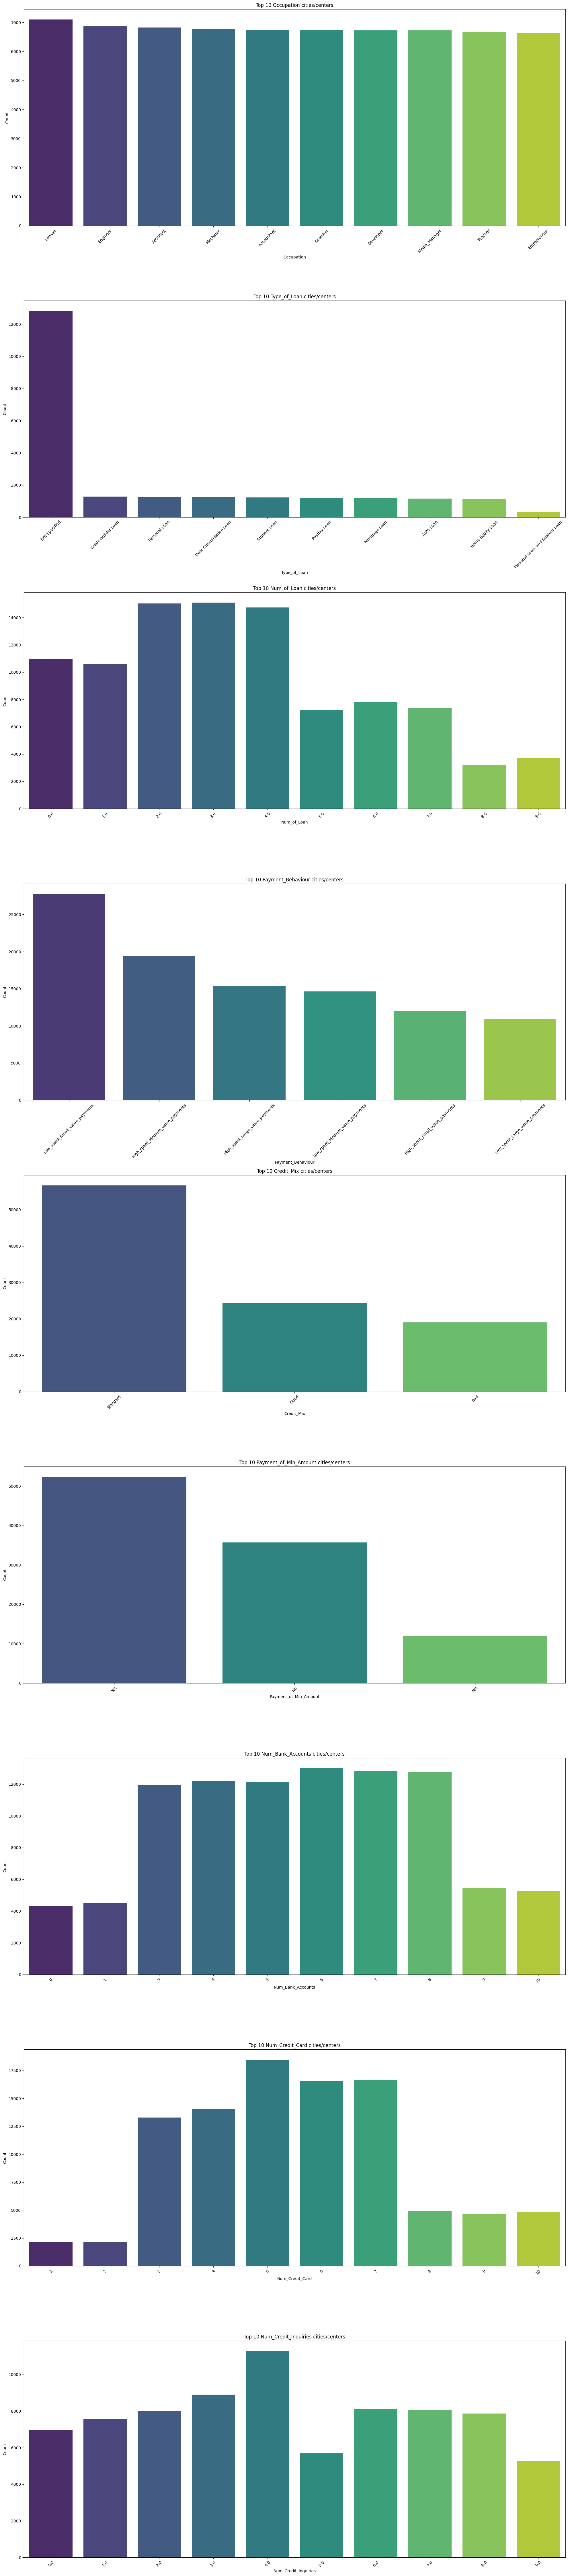

In [33]:
def Top10_Count(df):
    cols = ['Occupation', 'Type_of_Loan', 'Num_of_Loan', 'Payment_Behaviour', 'Credit_Mix', 'Payment_of_Min_Amount', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_Credit_Inquiries']

    plt.figure(figsize=(20, 10 * len(cols)))
    
    for idx, col in enumerate(cols):
        plt.subplot(len(cols), 1, idx + 1)  # Create one subplot per column
        
        
        top_10 = df.groupby(col).size().sort_values(ascending=False).head(10)
        
        # Create the bar plot for the top 10 cities/centers
        sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")
        
        # Add titles and labels
        plt.title(f"Top 10 {col} cities/centers")
        plt.xlabel(f"{col}")
        plt.ylabel("Count")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()

# Example usage
Top10_Count(df)

In [34]:
num_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [35]:
df['Age'] = df.groupby(df['Customer_ID'])['Age'].transform(
    lambda x: x.where(x <= 80, x.median())
)

In [36]:
df['Interest_Rate'] = df.groupby(df['Customer_ID'])['Interest_Rate'].transform(
    lambda x: x.where(x <= 30, x.median()))

In [37]:
df['Num_of_Loan'] = df.groupby(df['Customer_ID'])['Num_of_Loan'].transform(
    lambda x: x.where(x <= 10, x.median())
)

In [38]:
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df.groupby(df['Customer_ID'])['Credit_History_Age'].transform('median'))

In [39]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     8784
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64

In [40]:
df = df.reset_index(drop=True)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df.groupby(df['Customer_ID'])['Changed_Credit_Limit'].transform('median'))

In [41]:
df = df.reset_index(drop=True)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df.groupby(df['Customer_ID'])['Num_Credit_Inquiries'].transform('median'))

In [42]:
df = df.reset_index(drop=True)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df.groupby(df['Customer_ID'])['Num_of_Delayed_Payment'].transform('median'))

In [43]:
df = df.reset_index(drop=True)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df.groupby(df['Customer_ID'])['Amount_invested_monthly'].transform('median'))

In [44]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

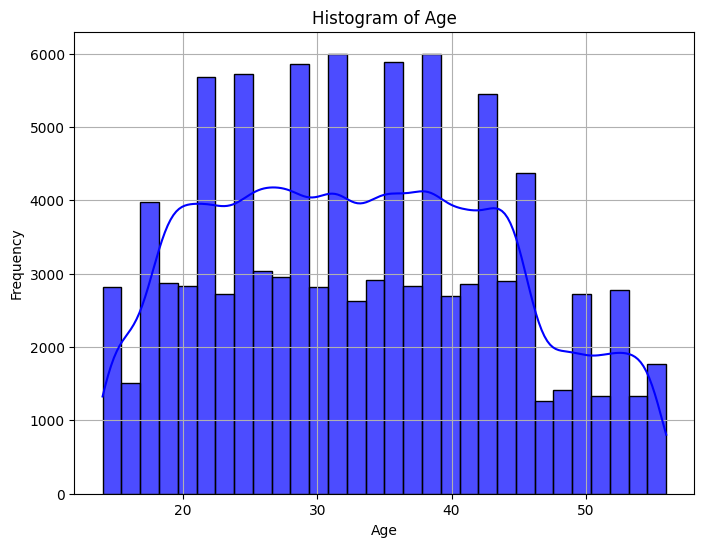

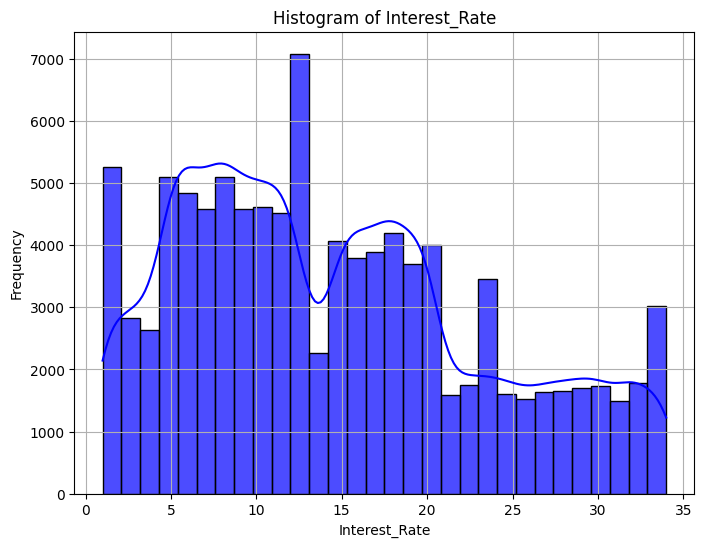

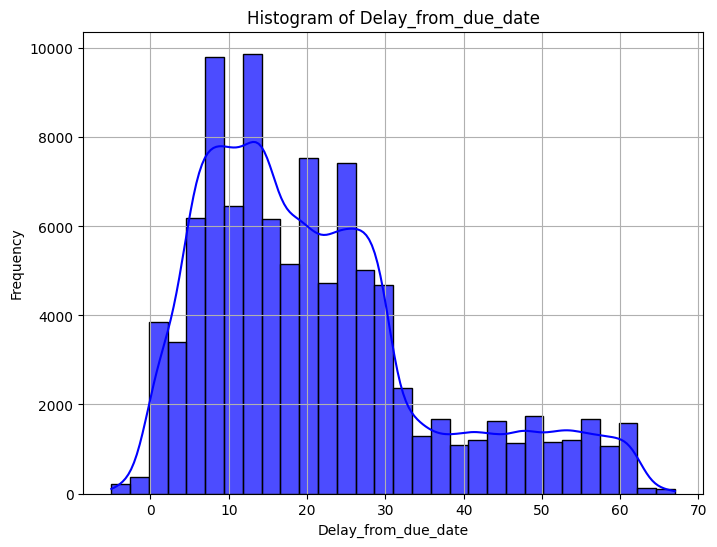

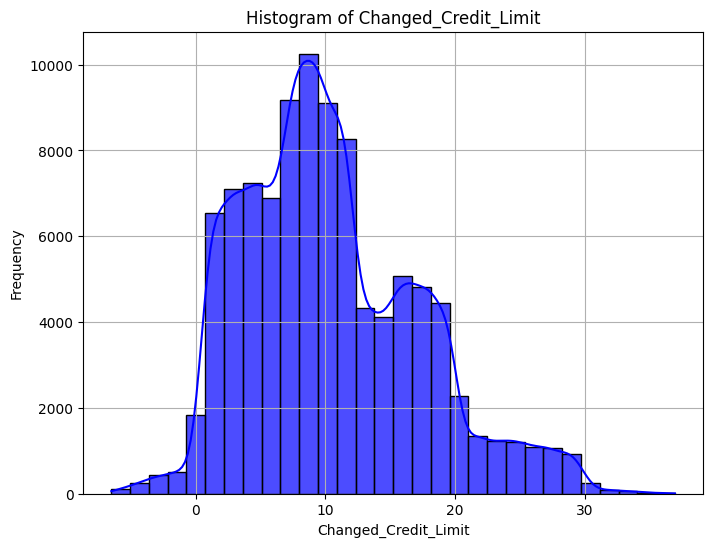

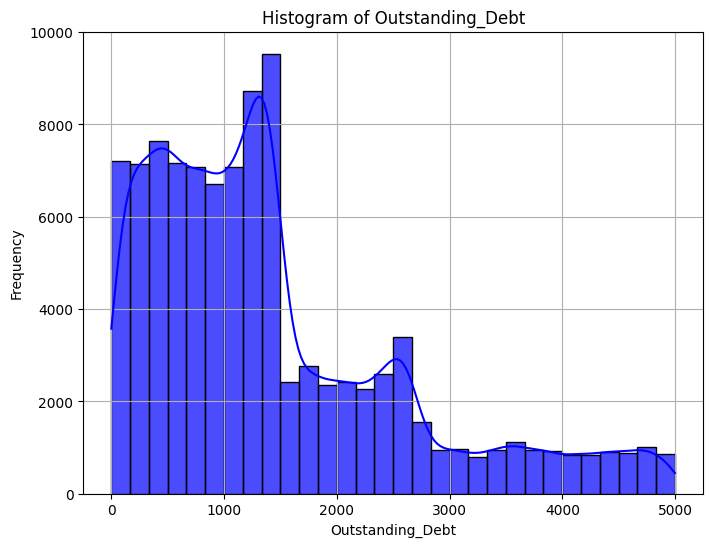

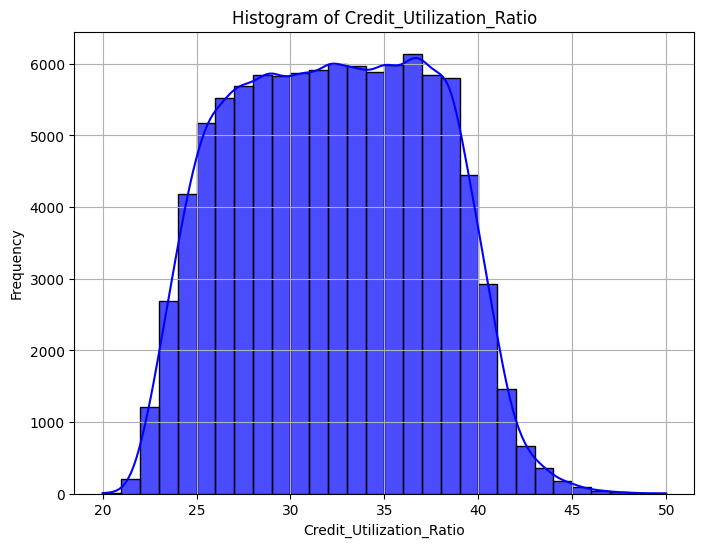

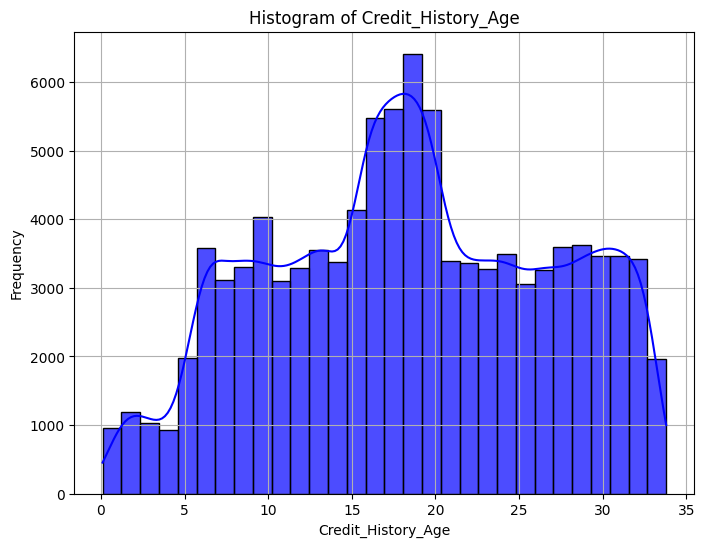

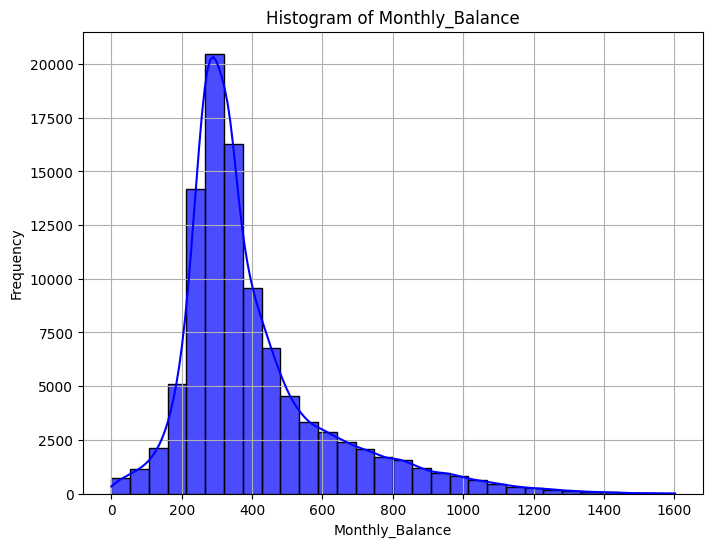

In [45]:
def create_histograms(df, num_cols):
    for col in num_cols:
        # Check if the column exists in the DataFrame
        if col in df.columns:
            plt.figure(figsize=(8, 6))
            sns.histplot(df[col], bins=30, color='blue', alpha=0.7, kde=True)
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()
        else:
            print(f"Column {col} not found in the DataFrame.")

# Example usage:
num_cats = ['Age', 'Interest_Rate','Delay_from_due_date', 'Changed_Credit_Limit',
            'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 
            'Monthly_Balance']

# Call the function to create histograms for all the numerical columns
create_histograms(df, num_cats)

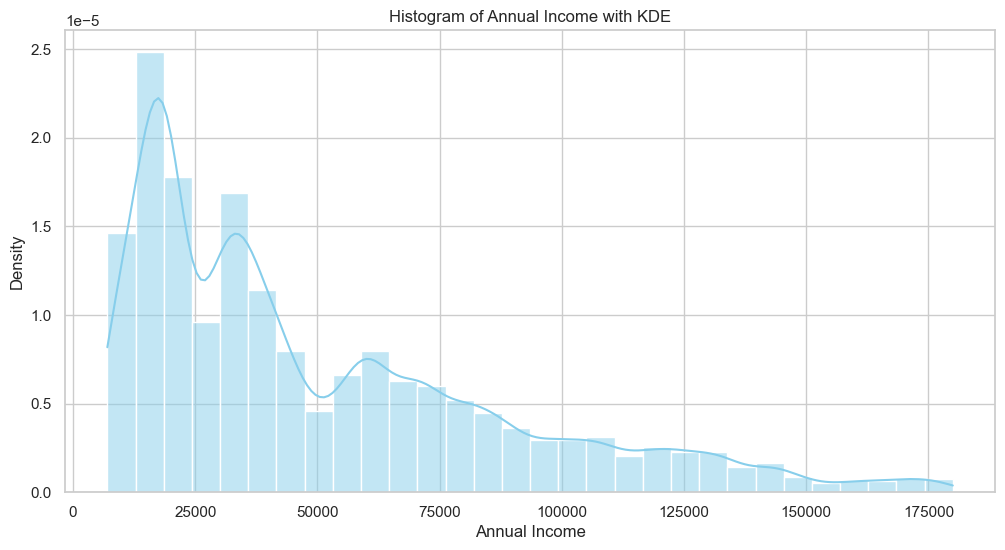

In [46]:


high_income_df = df[df['Annual_Income'] < 200000]

# If you want to access only the 'Annual_Income' column from the filtered DataFrame
high_income_values = high_income_df['Annual_Income']

sns.set(style="whitegrid")

# Create the histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(high_income_values, bins=30, kde=True, color='skyblue', stat='density')

# Add titles and labels
plt.title('Histogram of Annual Income with KDE')
plt.xlabel('Annual Income')
plt.ylabel('Density')

# Show the plot
plt.show()

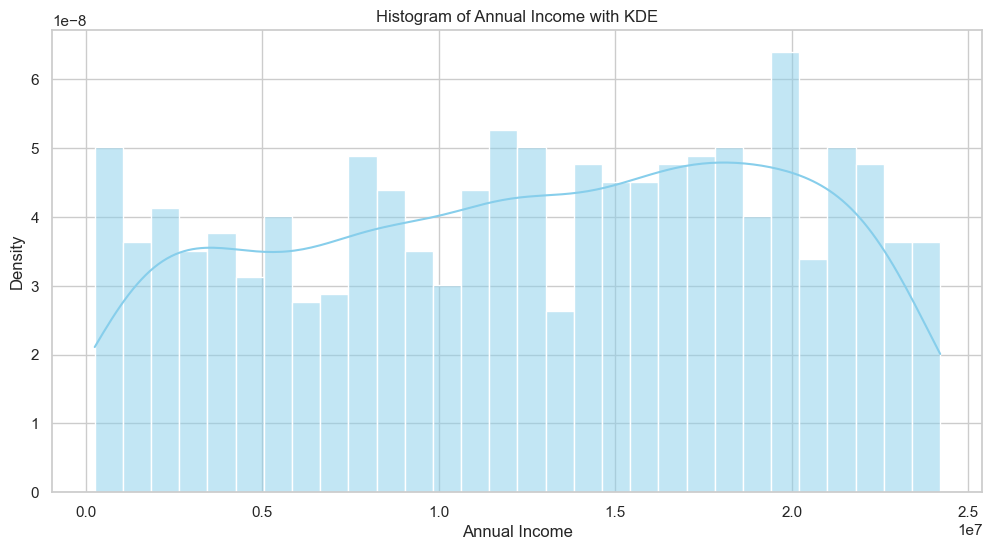

In [47]:


high_income_df = df[df['Annual_Income'] > 200000]

# If you want to access only the 'Annual_Income' column from the filtered DataFrame
high_income_values = high_income_df['Annual_Income']

sns.set(style="whitegrid")

# Create the histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(high_income_values, bins=30, kde=True, color='skyblue', stat='density')

# Add titles and labels
plt.title('Histogram of Annual Income with KDE')
plt.xlabel('Annual Income')
plt.ylabel('Density')

# Show the plot
plt.show()

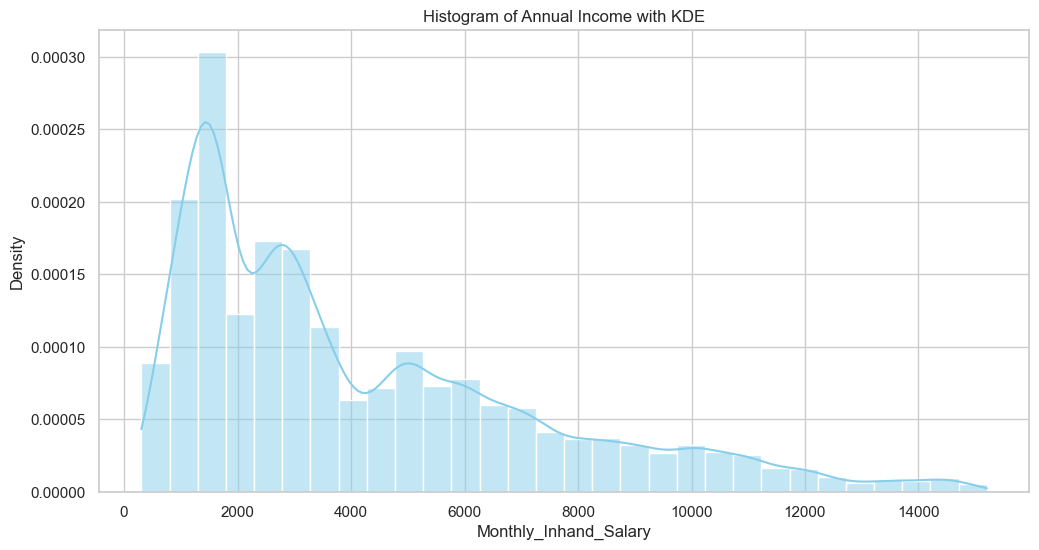

In [48]:


high_income_df = df[df['Monthly_Inhand_Salary']<17000]

# If you want to access only the 'Annual_Income' column from the filtered DataFrame
high_month_income_values = high_income_df['Monthly_Inhand_Salary']

sns.set(style="whitegrid")

# Create the histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(high_month_income_values, bins=30, kde=True, color='skyblue', stat='density')

# Add titles and labels
plt.title('Histogram of Annual Income with KDE')
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Density')

# Show the plot
plt.show()

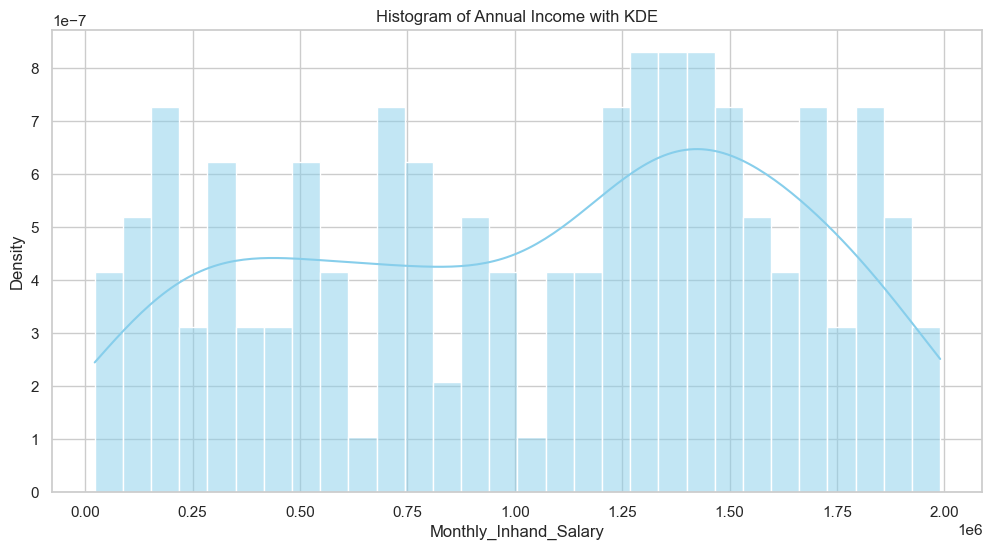

In [49]:


high_income_df = df[df['Monthly_Inhand_Salary']>17000]

# If you want to access only the 'Annual_Income' column from the filtered DataFrame
high_month_income_values = high_income_df['Monthly_Inhand_Salary']

sns.set(style="whitegrid")

# Create the histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(high_month_income_values, bins=30, kde=True, color='skyblue', stat='density')

# Add titles and labels
plt.title('Histogram of Annual Income with KDE')
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Density')

# Show the plot
plt.show()

### Minimum and Maximum value in Amount_invested_monthly column

In [50]:
df['Amount_invested_monthly'].min(), df['Amount_invested_monthly'].max()

(0.0, 1977.326102)

### Minimum and Maximum value in Num_of_Delayed_Payment column

In [51]:
df['Num_of_Delayed_Payment'].min(), df['Num_of_Delayed_Payment'].max()

(-3.0, 4397.0)

In [52]:
df = df.reset_index(drop=True)

### Calculating Credit Score using the following weight-age: 

1. Payment history (35%)
2. Amount owed (30%)
3. Length of credit history (15%)
4. New credit (10%)
5. Credit mix (10%)


- Payment History -> Columns: **Delay_from_due_date, Num_of_Delayed_Payment, Payment_of_Min_Amount**

- Amounts Owed -> Columns: **Outstanding_Debt, Credit_Utilization_Ratio**

- Length of Credit History -> Columns: **Credit_History_Age**

- Credit Mix -> Columns: **Credit_Mix**

- New Credit -> Columns: **Num_Credit_Inquiries**

- Debt-to-Income Ratio -> Columns: **Annual_Income, Outstanding_Debt**

- Types of Loans -> Columns: **Num_of_Loan, Type_of_Loan**

### Payment History Points

In [53]:
def Min_Amount_Score_value(payment):
    # Return -10 for 'Yes', else return 0
    return -10 if payment == 'Yes' else 0

# Apply the function to the DataFrame
df['Min_Amount_Score'] = df['Payment_of_Min_Amount'].apply(Min_Amount_Score_value)

#payment history score
df['Payment_History_Score'] = 3*df['Delay_from_due_date'] + 5*df['Num_of_Delayed_Payment'] + df['Min_Amount_Score']

#dropping "Min_Amount_Score" column
df.drop(columns = 'Min_Amount_Score', axis=1, inplace=True)

### Amount Owed Points

In [54]:
def amount_owed_score(row):
    # Scale Credit Utilization Ratio between 20.0 and 50.0
    credit_util_ratio = row['Credit_Utilization_Ratio']
    min_credit_util = 20.0
    max_credit_util = 50.0

    # Normalize the ratio (higher ratio results in lower score)
    utilization_score = 100 - ((credit_util_ratio - min_credit_util) / (max_credit_util - min_credit_util) * 100)
    utilization_score = max(0, min(100, utilization_score))  # Ensure the score is between 0 and 100

    # Scale Outstanding Debt between 0.23 and 4998.07
    outstanding_debt = row['Outstanding_Debt']
    min_outstanding_debt = 0.23
    max_outstanding_debt = 4998.07

    # Normalize the debt (higher debt results in lower score)
    debt_score = 100 - ((outstanding_debt - min_outstanding_debt) / (max_outstanding_debt - min_outstanding_debt) * 100)
    debt_score = max(0, min(100, debt_score))  # Ensure the score is between 0 and 100

    # Calculate weighted score (50% for utilization and 50% for outstanding debt)
    amount_owed_score = utilization_score + debt_score
    
    return amount_owed_score

# Apply the function to each row in the DataFrame
df['amount_owed_score'] = df.apply(amount_owed_score, axis=1)


### Credit Mix Points

In [55]:
def credit_mix_score_value(credit_mix):
    if credit_mix == "Good":
        score = 250
    elif credit_mix == "Bad":
        score = 150
    else:
        score = 100
    return score  

df['credit_mix_score'] = df['Credit_Mix'].apply(credit_mix_score_value)


### Credit History Inquiry Points

In [56]:
def calculate_credit_history_score(row, max_credit_history_age):
    # Calculate the credit history score as a percentage of the maximum
    credit_history_score = (row['Credit_History_Age'] / max_credit_history_age) * 100
    return credit_history_score

# Find the maximum credit history age in the dataset
max_credit_history_age = df['Credit_History_Age'].max()

# Apply the function to calculate Credit History Score for each individual
df['Credit_History_Score'] = df.apply(calculate_credit_history_score, axis=1, max_credit_history_age=max_credit_history_age)


### New Credit Inquiry Point

In [57]:
def credit_inquiries_score(num_inquiries):
    # Apply scoring logic based on number of credit inquiries
    if num_inquiries <= 1:
        score = 200  # Best score for 0 or 1 inquiries
    elif 2 <= num_inquiries <= 5:
        score = 150  # Moderate score for 2-5 inquiries
    elif 6 <= num_inquiries <= 10:
        score = 100  # Lower score for 6-10 inquiries
    else:
        score = 70  # Minimum score for more than 10 inquiries
    return score

# Apply the function to the Num_Credit_Inquiries column
df['credit_inquiries_score'] = df['Num_Credit_Inquiries'].apply(credit_inquiries_score)


### Debt-to-Income Ratio

In [58]:
def calculate_dti_ratio(row):
    # Ensure we are not dividing by zero (Annual Income should not be 0)
    if row['Annual_Income'] > 0:
        # Calculate Debt-to-Income Ratio as a percentage
        dti_ratio = (row['Outstanding_Debt'] / row['Annual_Income']) * 100
    else:
        # Handle cases where Annual Income is 0 (DTI ratio would be undefined)
        dti_ratio = np.nan  # or set a specific value if preferred (e.g., -1)
    
    return dti_ratio

# Apply the function to calculate DTI for each row in the DataFrame
df['Debt_to_Income_Ratio'] = df.apply(calculate_dti_ratio, axis=1)

### Final Credit Score

In [59]:
df['Credit Score'] = df['Payment_History_Score'] + df['amount_owed_score'] + df['credit_mix_score'] + df['Credit_History_Score'] + df['credit_inquiries_score']

In [60]:
def replace_credit_score(group):
    # Calculate the median of the Credit Score for the group
    median_score = group['Credit Score'].median()
    
    # Replace values greater than 850 with the median score
    group.loc[group['Credit Score'] > 850, 'Credit Score'] = median_score
    return group

# Apply the function to each Customer_ID group
df = df.groupby('Customer_ID').apply(replace_credit_score)

In [61]:
df = df.reset_index(drop=True)

In [62]:
df['Credit Score'].min(), df['Credit Score'].max()

(334.6099654386592, 858.3275726460549)

In [63]:
df.drop(columns=['Debt_to_Income_Ratio', 'credit_inquiries_score', 'Credit_History_Score', 'amount_owed_score', 'Payment_History_Score', 'credit_mix_score'], inplace=True, axis=1)

In [64]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit Score                0
dtype: int64

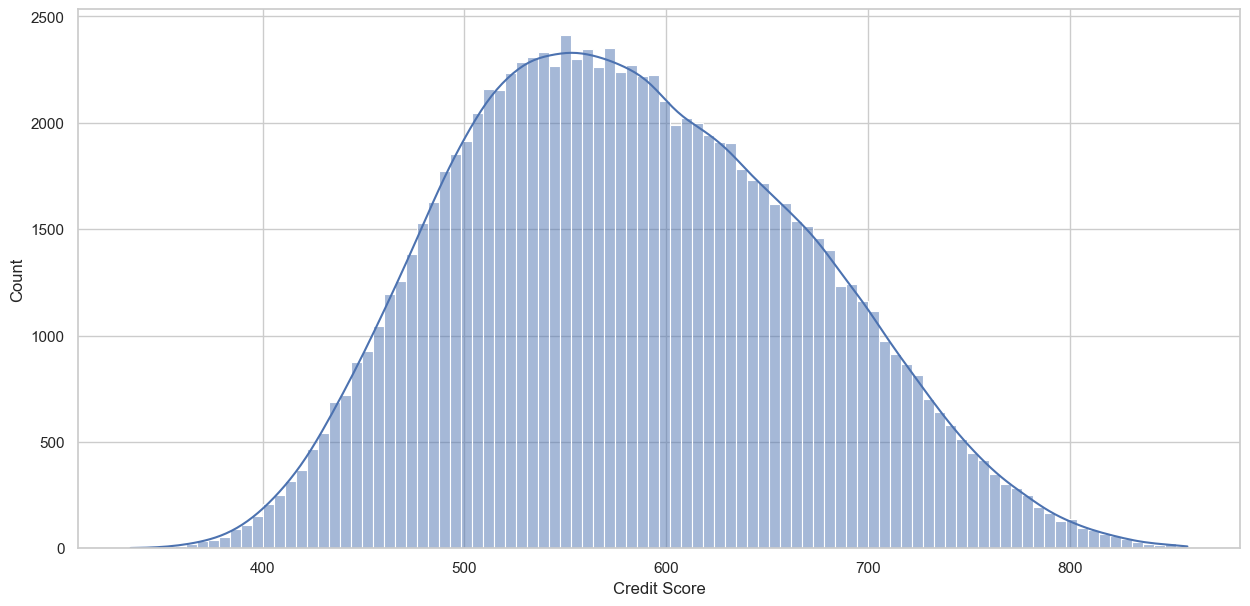

In [65]:
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='Credit Score', kde=True)
plt.show()

In [66]:
num_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

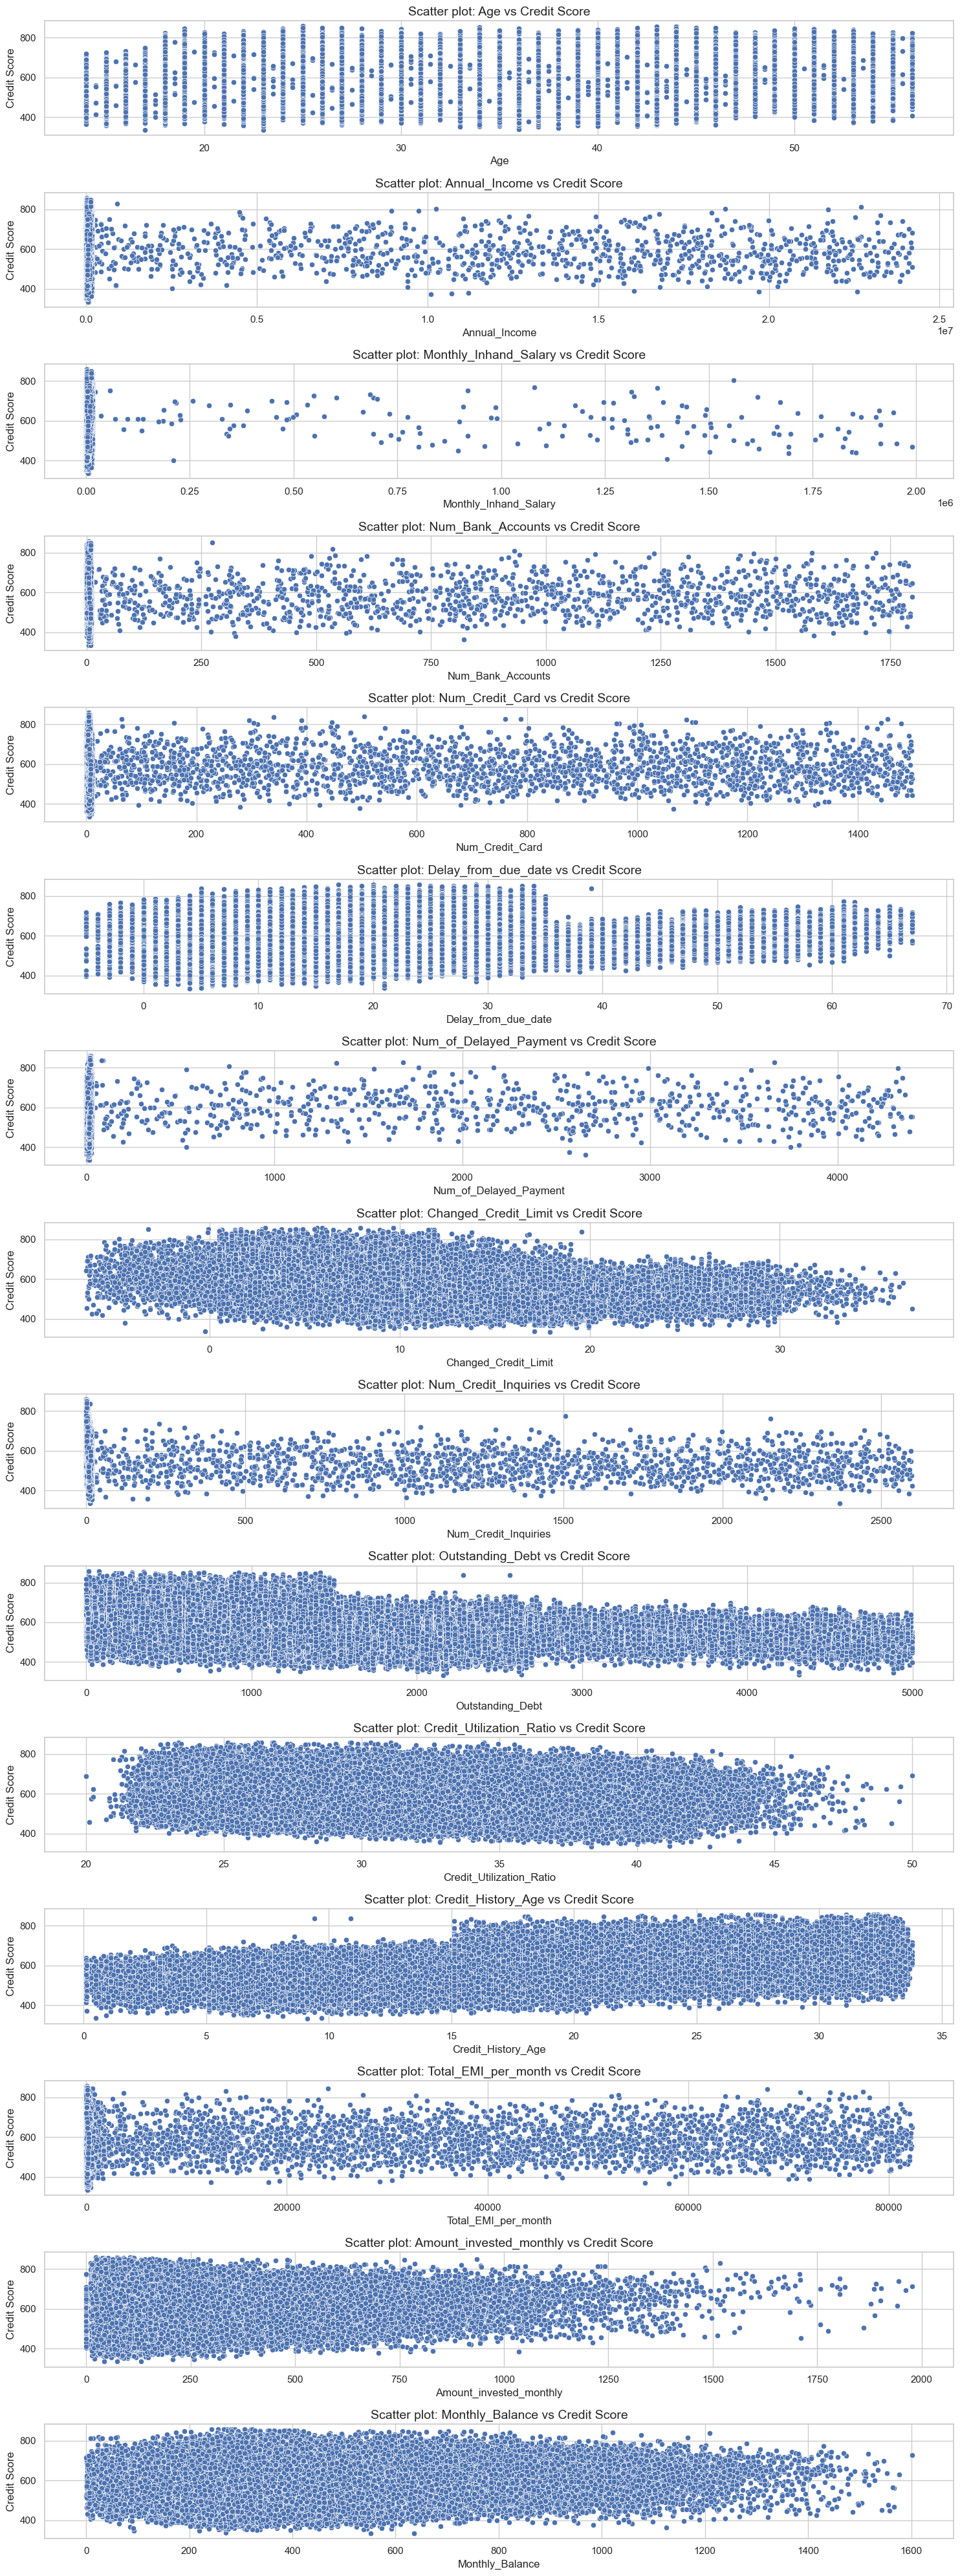

In [67]:
num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
            'Num_Credit_Card', 'Delay_from_due_date',
            'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
            'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
            'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

target_variable = 'Credit Score'

# Set up the figure size and number of subplots
plt.figure(figsize=(15, 40))  # Adjust size based on number of columns

# Loop through each numeric column and create a scatter plot with the target variable
for idx, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, idx + 1)
    
    # Create a scatter plot
    sns.scatterplot(data=df, x=col, y=target_variable)
    
    # Add titles and labels
    plt.title(f'Scatter plot: {col} vs {target_variable}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_variable)

plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

### Summary

1. Age
Summary: Age does not significantly influence credit scores, as scores are evenly distributed across different age groups.
2. Annual Income
Summary: No clear relationship between annual income and credit score. Credit scores vary widely across different income levels.
3. Monthly Inhand Salary
Summary: Similar to annual income, no significant trend is visible. Higher or lower monthly salaries do not strongly correlate with credit score.
4. Num Bank Accounts
Summary: The number of bank accounts does not exhibit a noticeable pattern in relation to credit score. People with various numbers of bank accounts have diverse credit scores.
5. Num Credit Card
Summary: There is no distinct correlation between the number of credit cards and credit scores. Having more credit cards doesn’t guarantee higher or lower scores.
6. Delay from Due Date
Summary: A higher delay from the payment due date is associated with lower credit scores, showing a weak negative trend.
7. Num of Delayed Payment
Summary: More delayed payments are correlated with lower credit scores, reflecting a clear negative impact.
8. Changed Credit Limit
Summary: Slight upward trend; those with changes in credit limits may have higher credit scores, but the correlation is weak.
9. Num Credit Inquiries
Summary: No clear pattern or trend between the number of credit inquiries and credit score. Inquiries alone do not strongly influence credit scores.
10. Outstanding Debt
Summary: Higher outstanding debt is weakly correlated with lower credit scores. As debt increases, credit scores tend to decrease slightly.
11. Credit Utilization Ratio
Summary: Higher credit utilization ratios generally lead to lower credit scores, indicating a negative correlation.
12. Credit History Age
Summary: A longer credit history is associated with higher credit scores, demonstrating a positive correlation between credit history length and score.
13. Total EMI per Month
Summary: No clear trend is observed. The total EMI per month doesn’t strongly affect the credit score.
14. Amount Invested Monthly
Summary: No noticeable relationship between the amount invested monthly and credit score. The scatter is evenly spread across the credit score range.
15. Monthly Balance
Summary: Monthly balance shows no clear correlation with credit scores. High and low balances appear to have a limited effect on credit score.

In [68]:
# Replace values in 'Num_Bank_Accounts' and 'Num_Credit_Card' with 10 if greater than 10
df.loc[df['Num_Bank_Accounts'] > 10, 'Num_Bank_Accounts'] = 10
df.loc[df['Num_Credit_Card'] > 10, 'Num_Credit_Card'] = 10


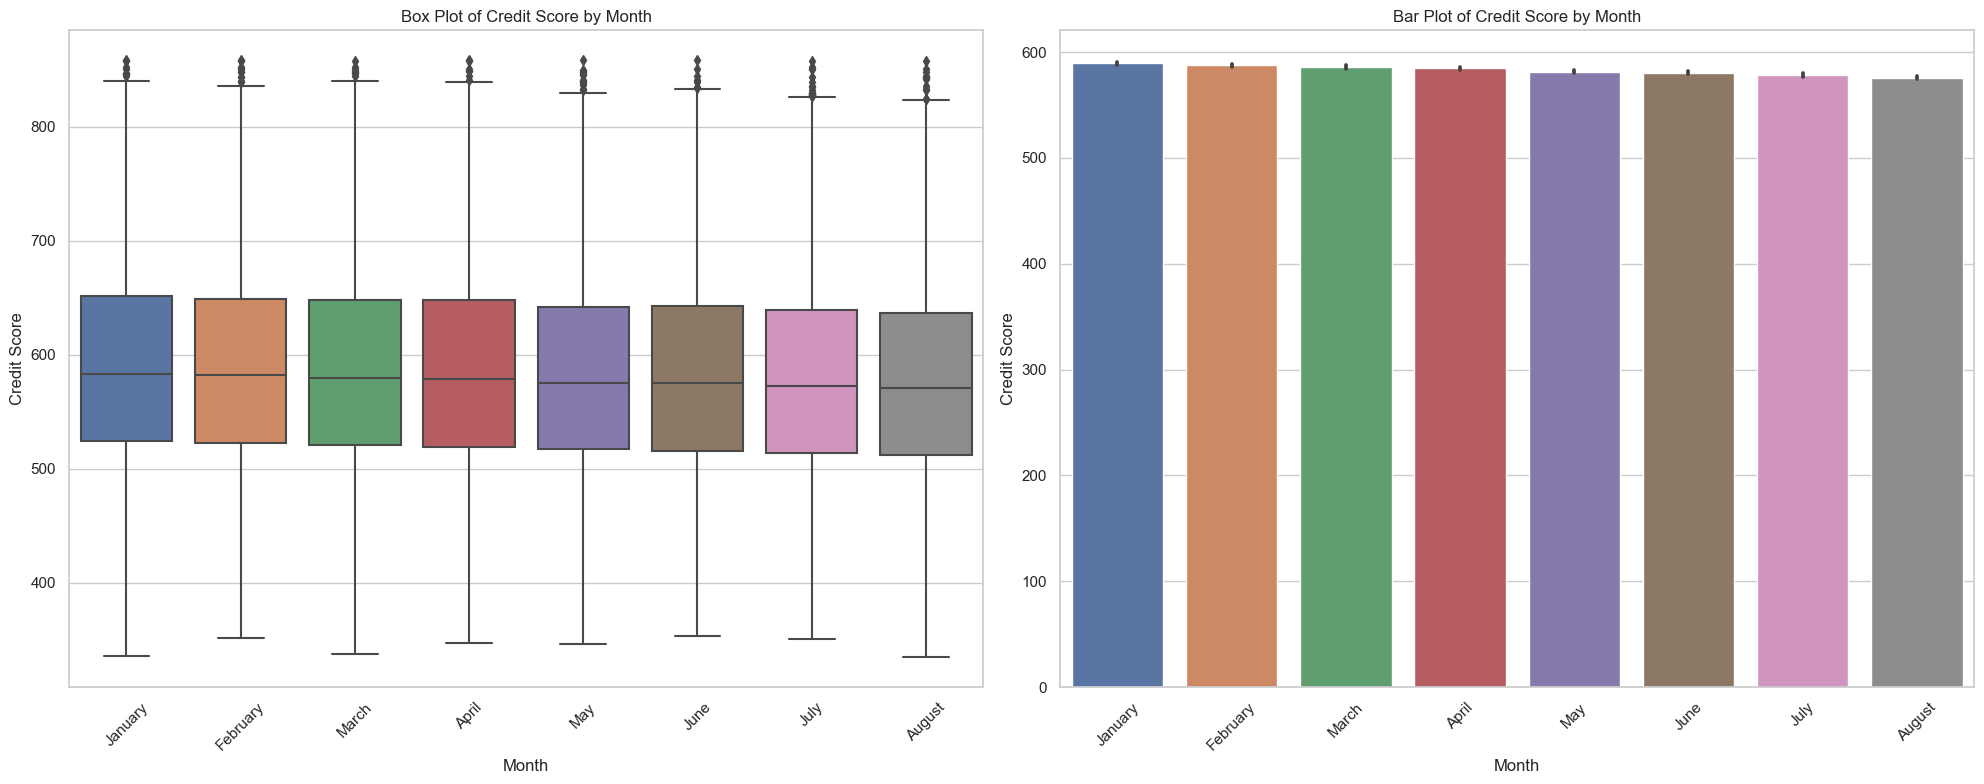

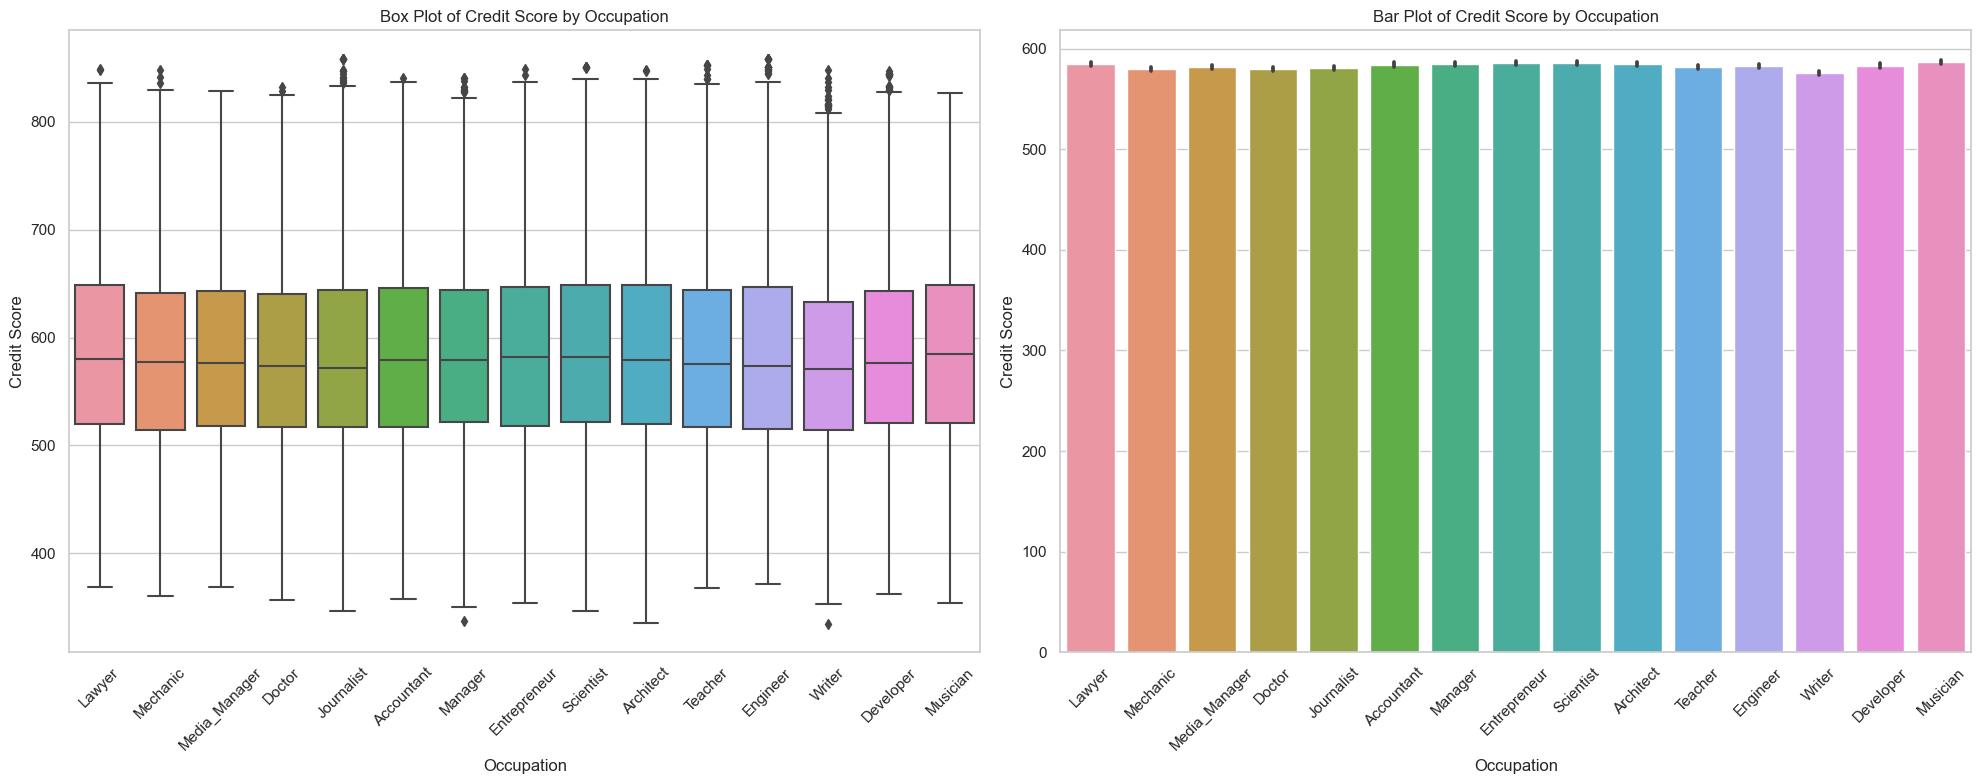

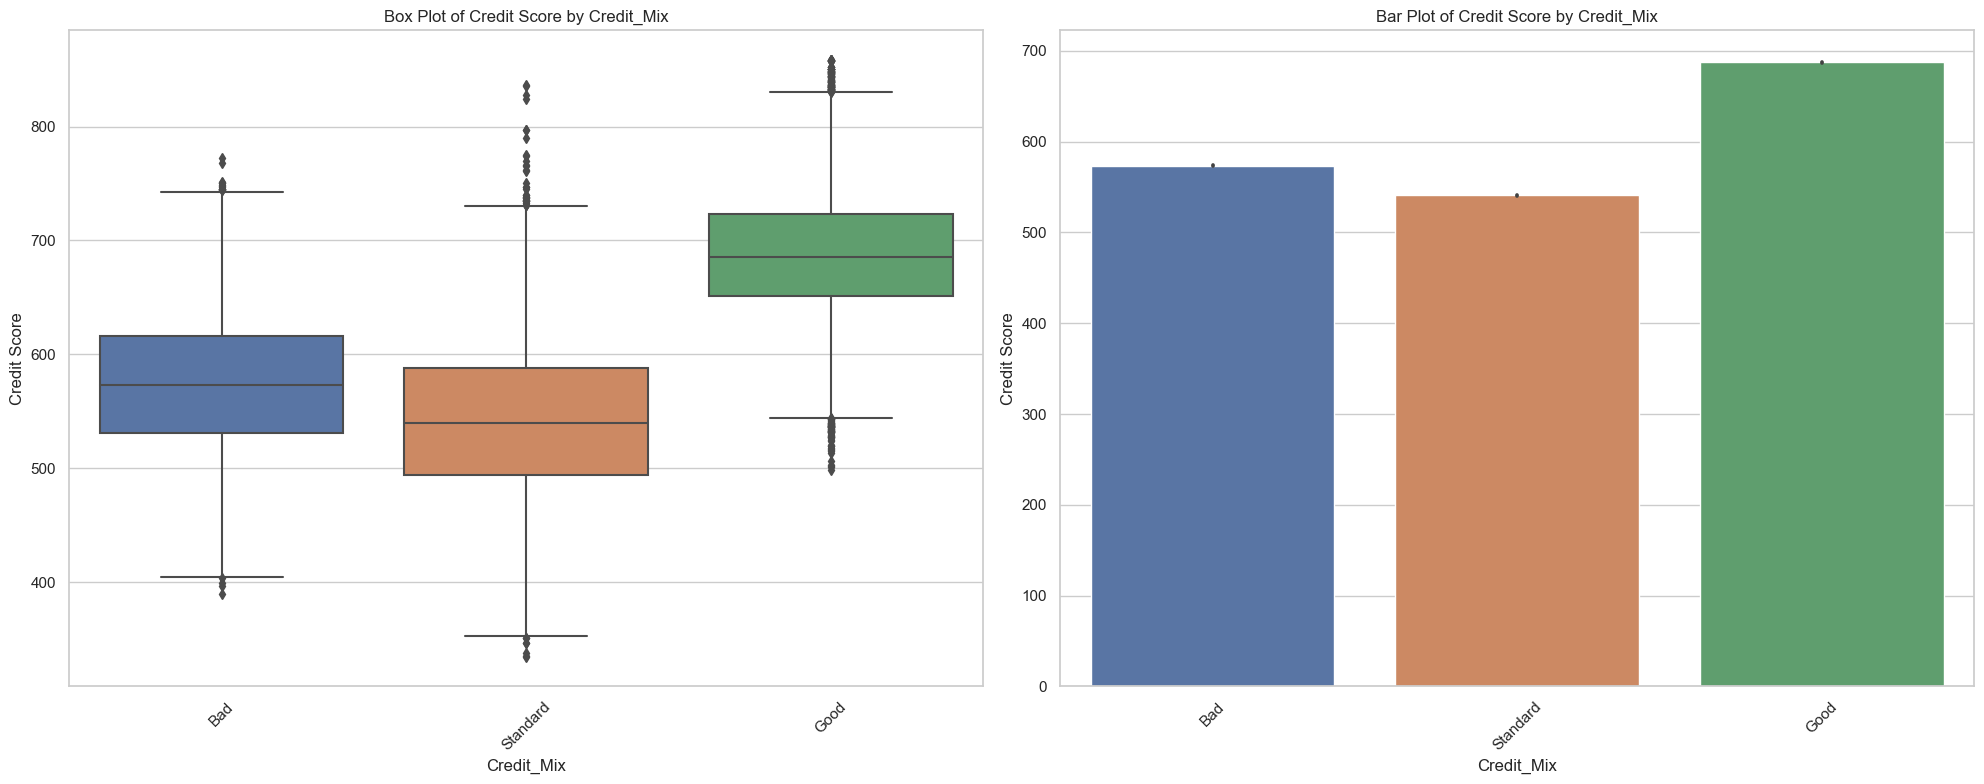

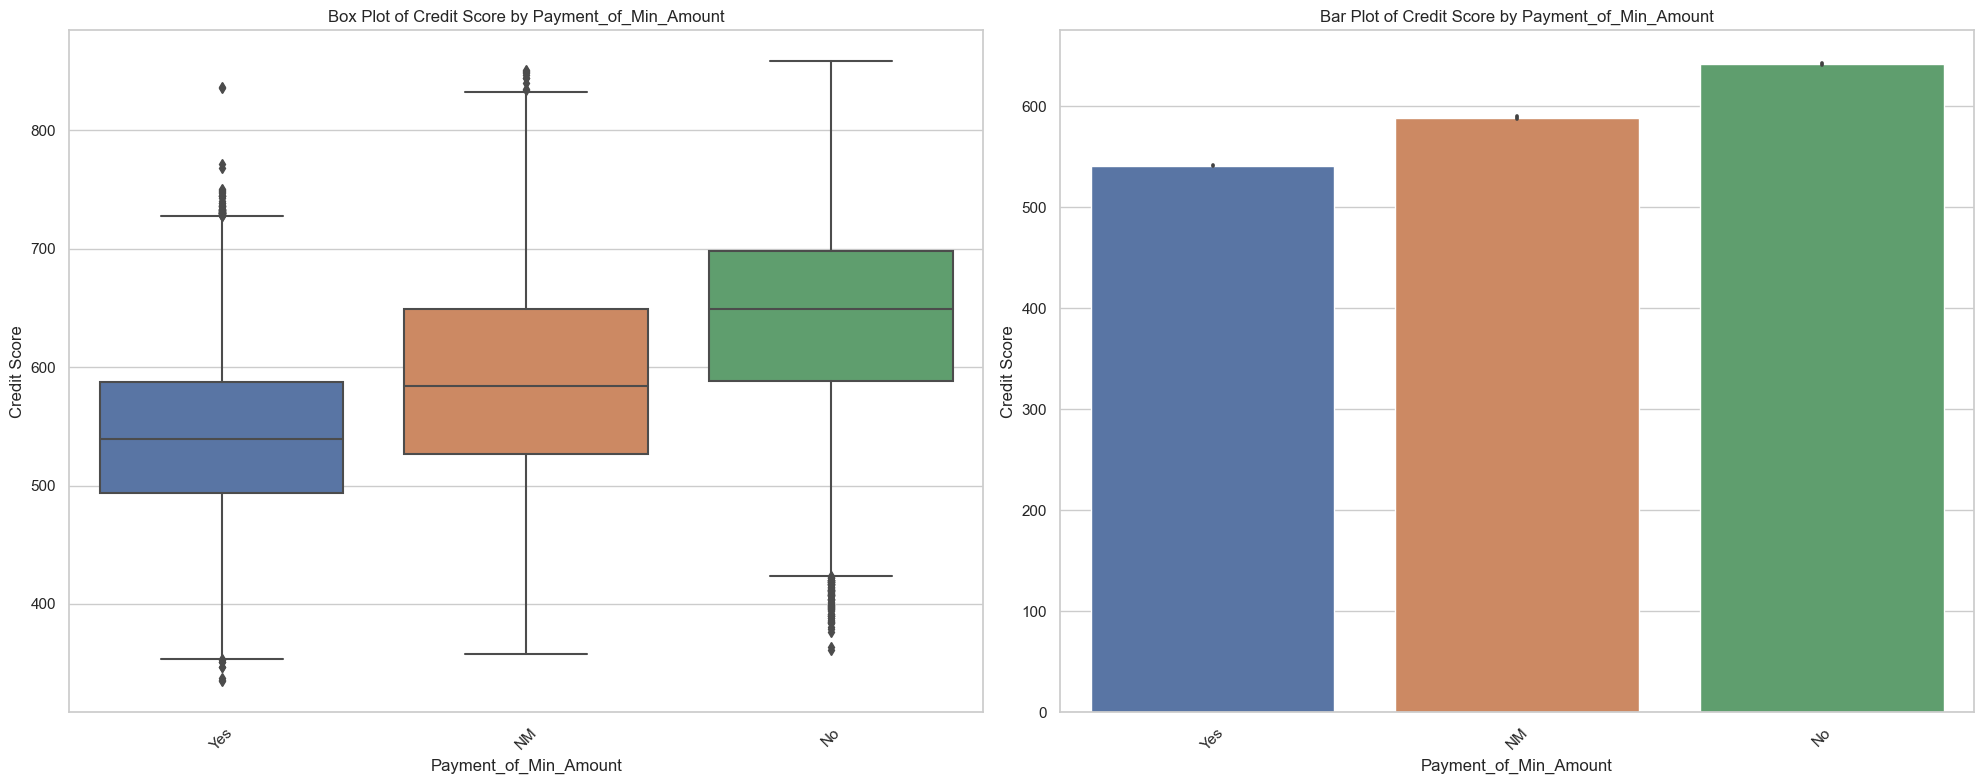

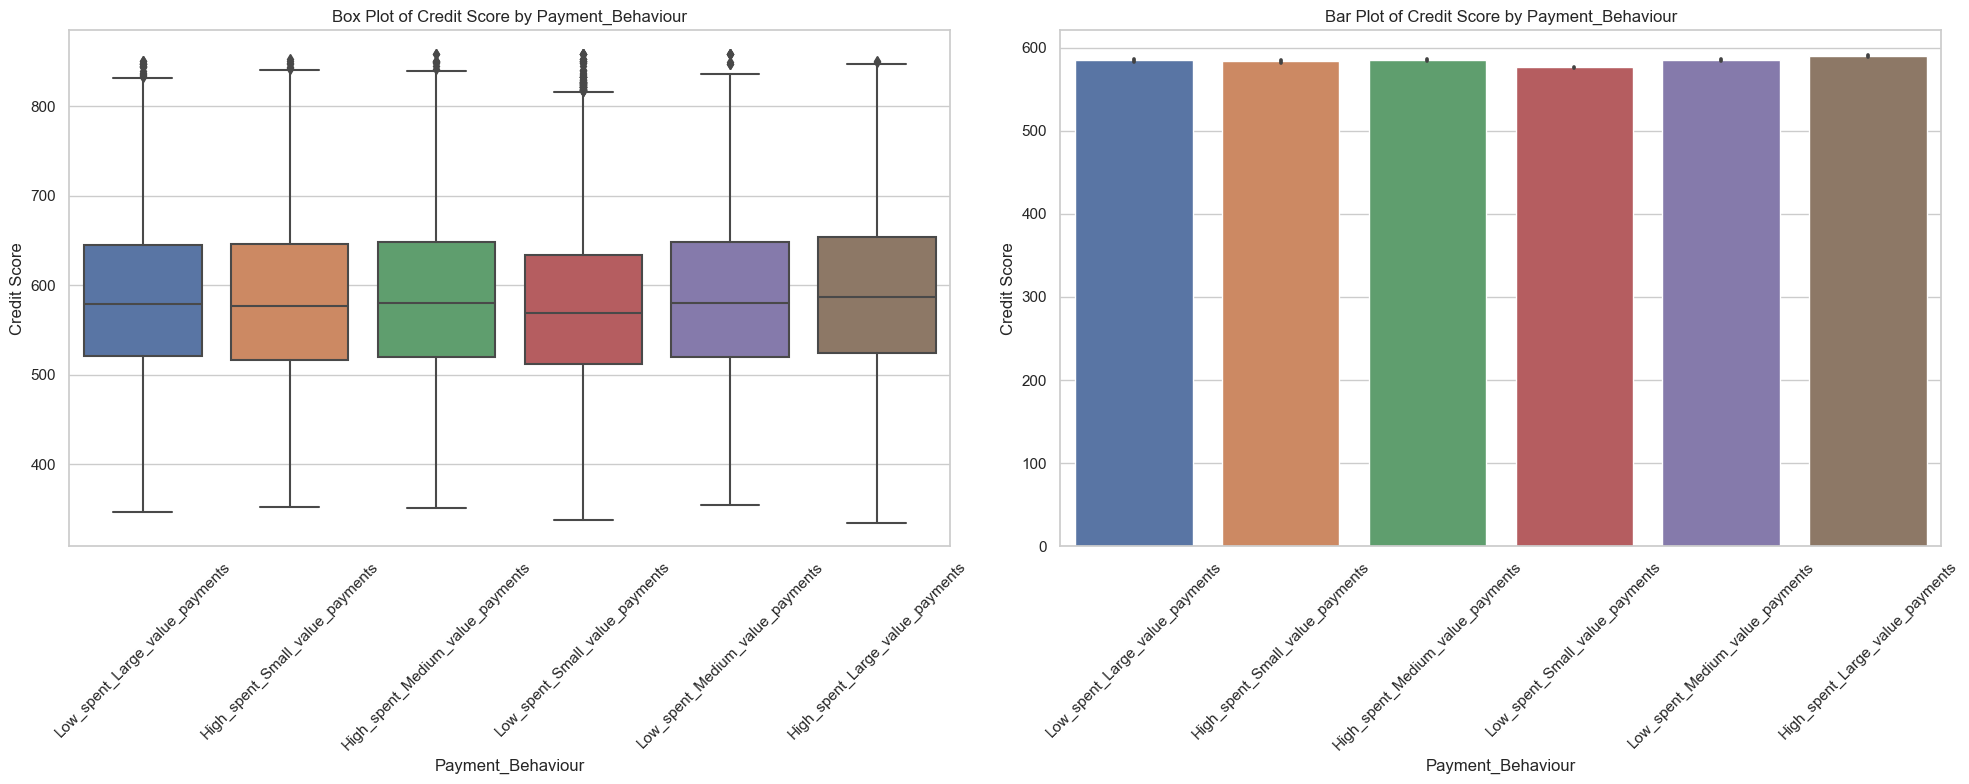

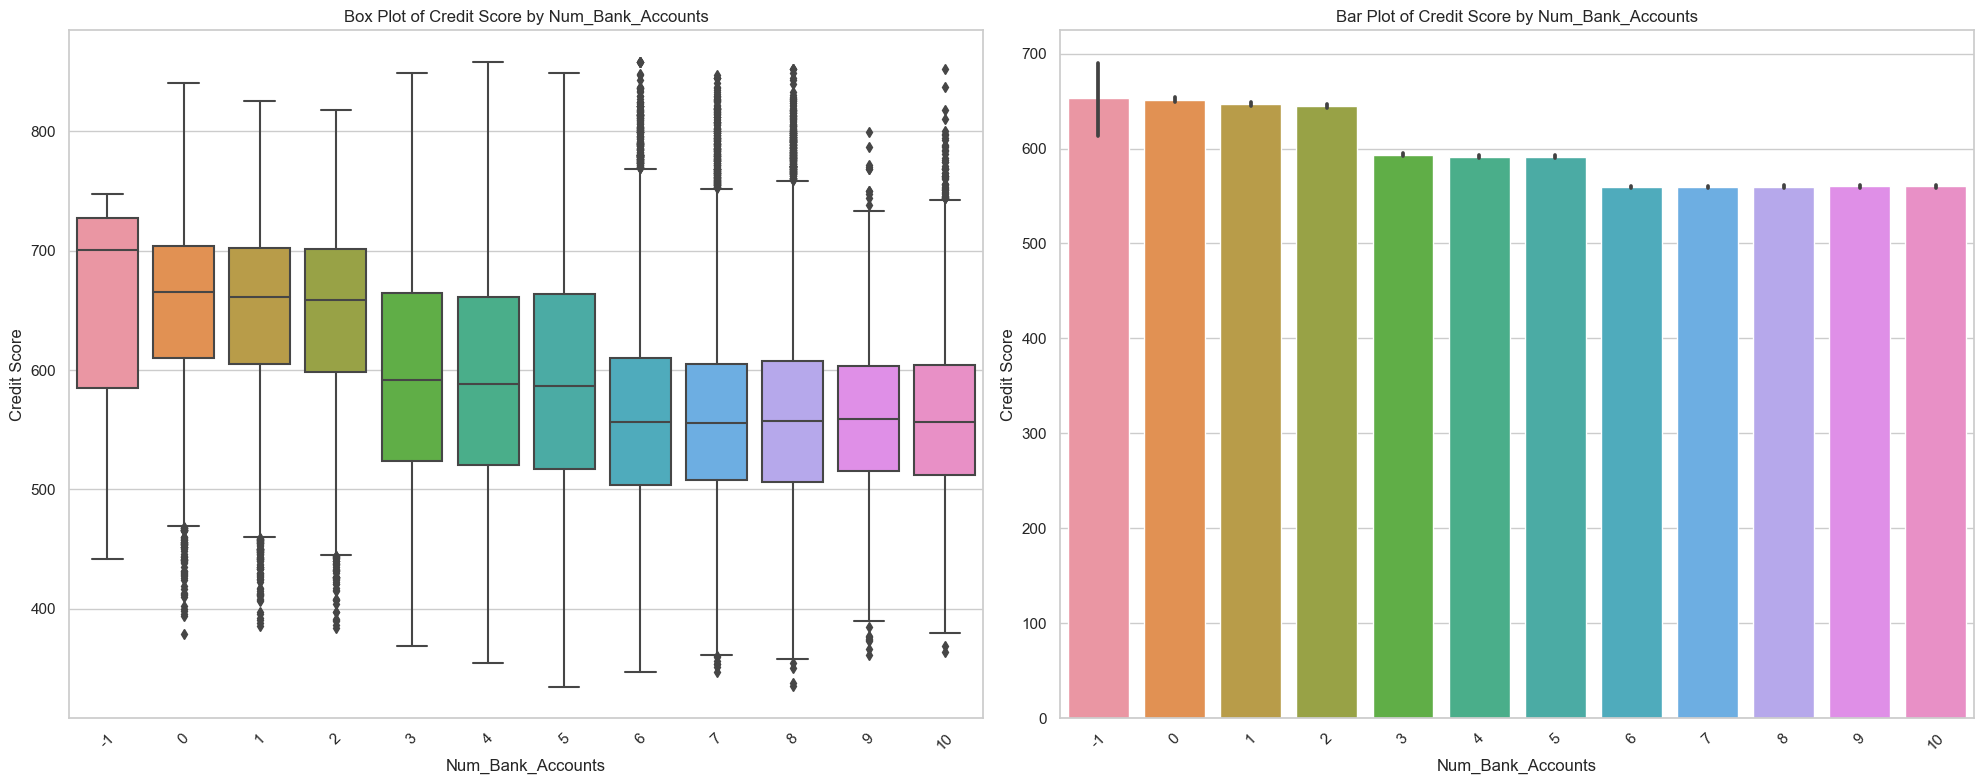

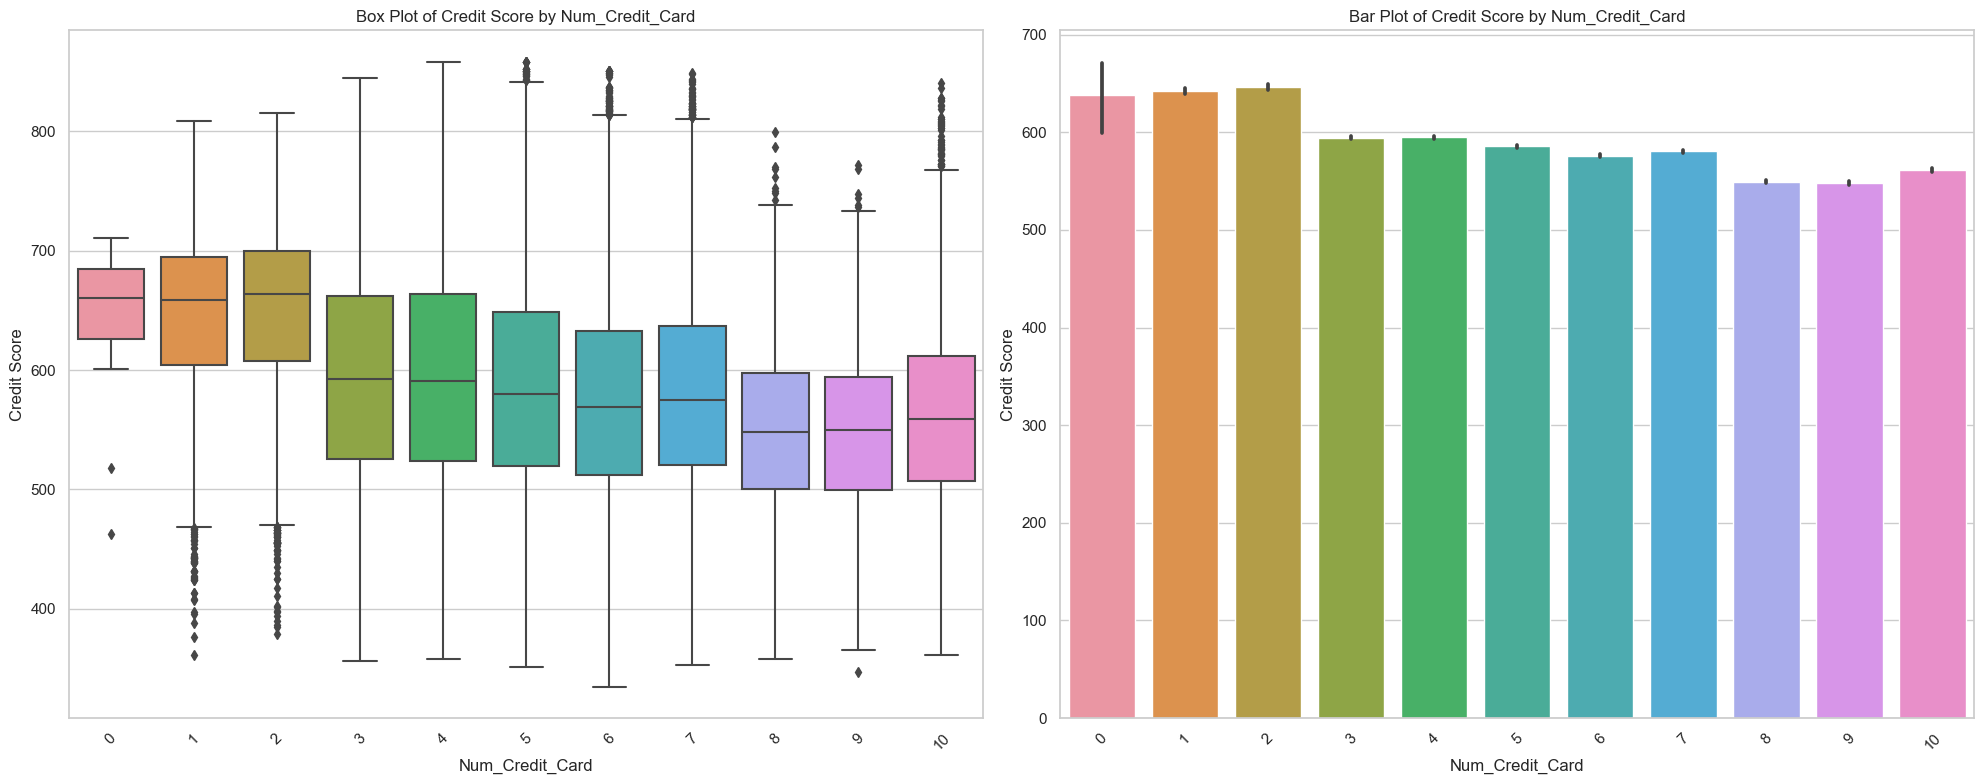

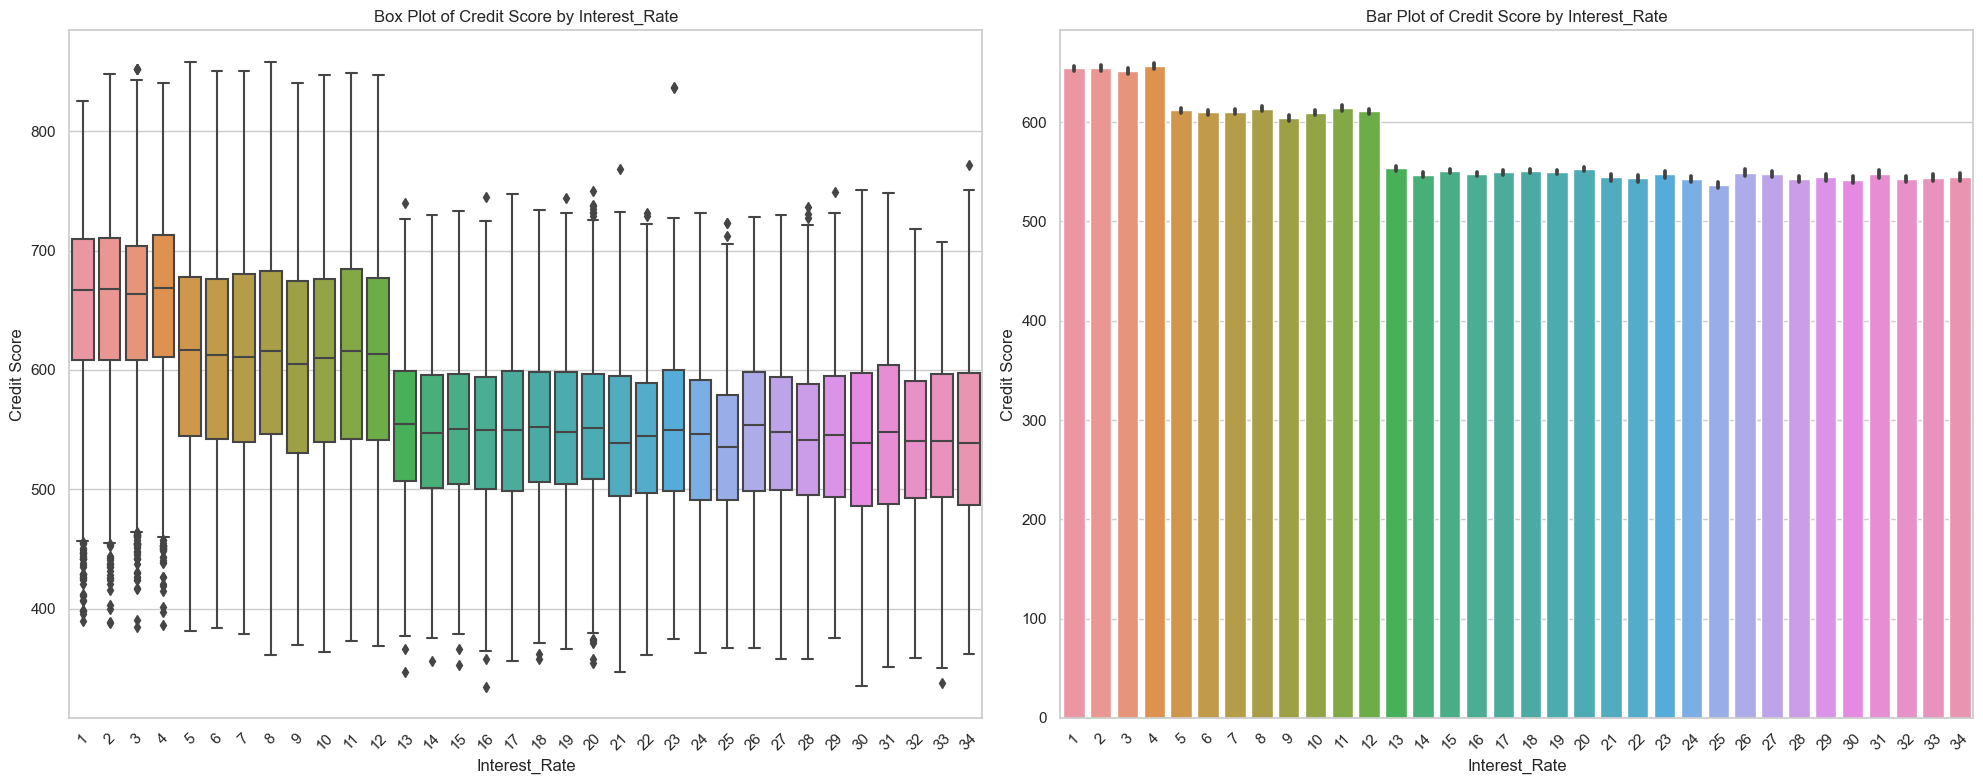

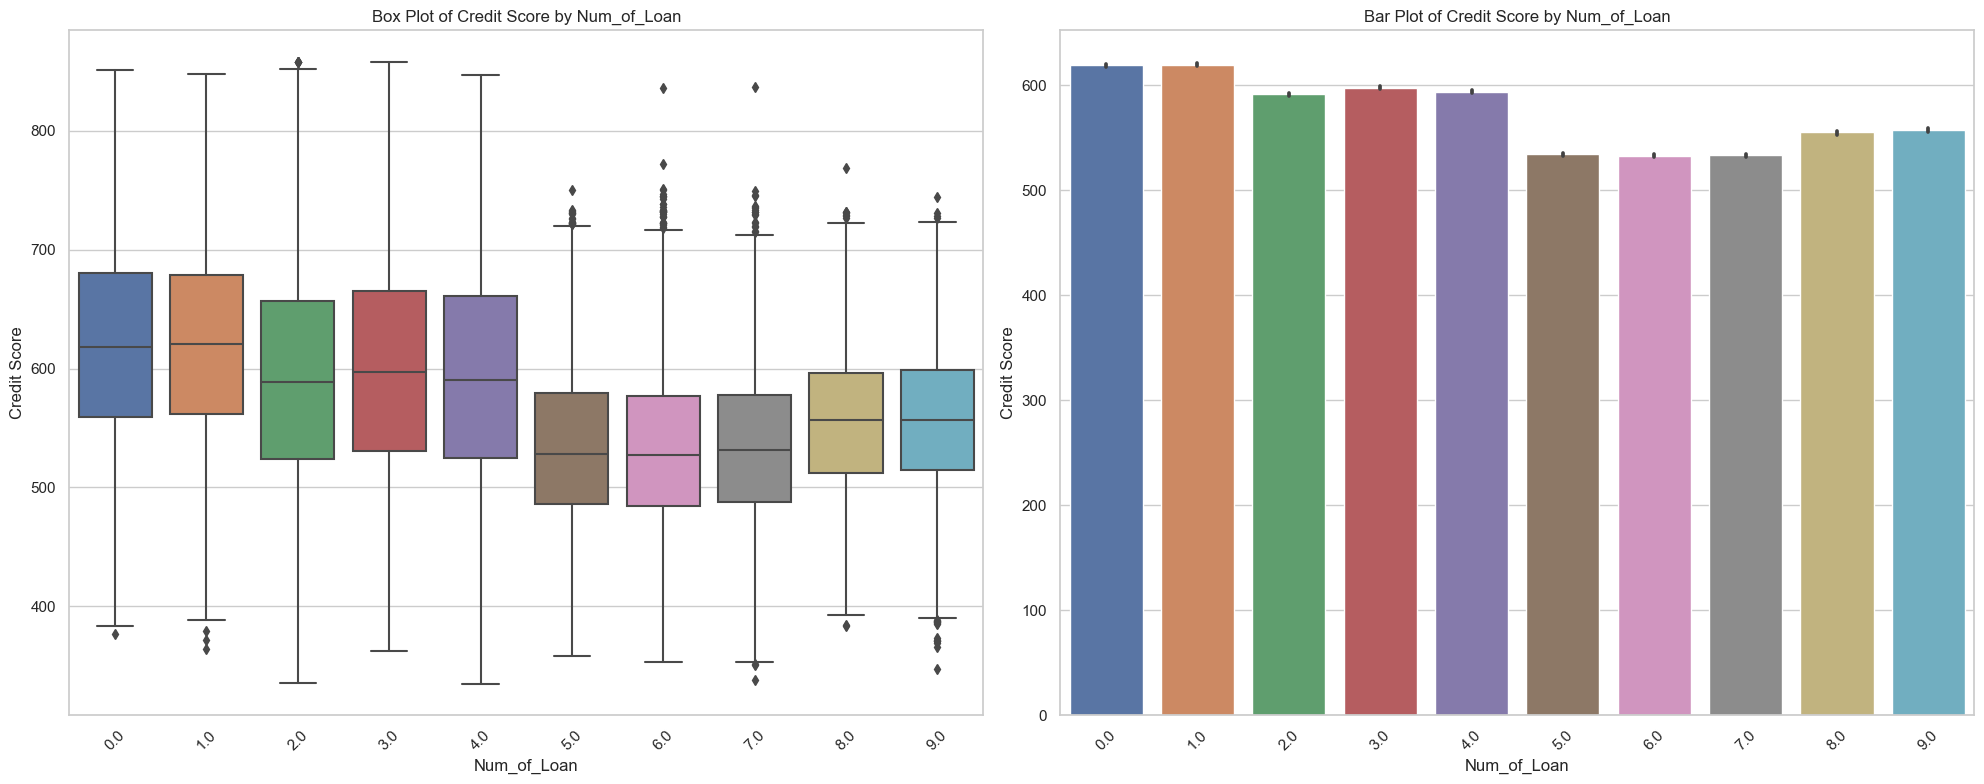

In [69]:
def create_plots(df, target_variable='Credit Score'):
    cat_columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']
    
    for col in cat_columns:
        plt.figure(figsize=(20, 8))
        
        # Create a box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=col, y=target_variable, data=df)
        plt.title(f'Box Plot of {target_variable} by {col}')
        plt.xticks(rotation=45)
        
        # Create a bar plot
        plt.subplot(1, 2, 2)
        sns.barplot(x=col, y=target_variable, data=df, estimator='mean')
        plt.title(f'Bar Plot of {target_variable} by {col}')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

# Example usage:
create_plots(df)

1. Month, Occupation and Payment_Behavior:
- For the given data there is no significant difference between the different months and occupation.

2. Credit_Mix:
- Higher Credit Score for "Good" Credit Mix: Individuals with a "Good" credit mix tend to have higher credit scores than those with a "Bad" or "Standard" credit mix.

3. Num_Accounts, Num_of_Loans, Num_of_Credit_Card and Interest Rate:
- There is a negative correlation between credit score and Num_Accounts/Num_of_Loans/No of Cards.
- More accounts or loans or credit cards or interest rate are generally associated with lower credit scores.

4. Payment_of_Min_Amount:
- Plots show that credit score increases with payment of the minimum amount, with the highest credit score for "Yes" and the lowest for "No."


In [70]:
df.sample(15)

ID Customer_ID     Month                  Name   Age          SSN   
21533  0x1cd7b  CUS_0x3a85      June         Nate Raymondo  29.0  058-58-1144  \
58985  0x1e1c3  CUS_0x7e7c  February      Lorraine Turnerk  21.0  172-68-0059   
53182   0xf264  CUS_0x73a5      July  Prakash Chakravartih  22.0  759-19-6701   
72885   0xf02f  CUS_0x9867      June              Nishantz  32.0  684-17-4210   
29370   0xa154  CUS_0x486d     March               Levinev  43.0  288-92-4914   
81763  0x14121  CUS_0xa8c6     April                Langep  19.0  214-47-2407   
11143  0x1149d  CUS_0x269b    August     Miguel Gutierrezg  43.0  615-23-3582   
38567   0x702d   CUS_0x590    August                Langep  43.0  084-84-5855   
91791  0x16b01  CUS_0xbafa    August                Sarahf  40.0  769-76-3568   
70791   0xbc41  CUS_0x9466    August             Jenniferf  50.0  168-77-9086   
96638   0x2160  CUS_0xc434      July             Mariannae  36.0  891-36-0838   
90507  0x23e7d  CUS_0xb8a1     April            Rudegeairg  46.0  853-28-7975   
54906   0x2054  CUS_0x76e7     March                   env  26.0  532-39-3348   
76957  0x22eb3  CUS_0x9fcf      June            Baertleinm  15.0  177-47-5939   
97310   0x3984  CUS_0xc594      July           Jan Harveyh  55.0  330-58-4458   

          Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts   
21533       Musician      12731.780            1246.981667                  6  \
58985         Writer      63861.360            5487.780000                  4   
53182      Developer      50291.220            3999.935000                  7   
72885      Architect     104506.980            8986.915000                  5   
29370     Journalist       9377.445             818.453750                  5   
81763  Media_Manager      60759.540            5031.295000                  5   
11143        Teacher      82757.960            6692.496667                  6   
38567     Journalist      63539.560            4996.963333                  8   
91791     Accountant      60015.000            5064.250000                  7   
70791         Doctor      61269.160            5295.763333                  6   
96638     Journalist      11245.110             937.092500                  3   
90507      Architect     178814.160           15167.180000                  3   
54906        Manager      34128.920            2740.076667                  6   
76957         Doctor      19594.290            1834.857500                  8   
97310     Journalist      60841.980            5053.165000                  3   

       Num_Credit_Card  Interest_Rate  Num_of_Loan   
21533                5              8          0.0  \
58985                6             12          4.0   
53182                9             22          4.0   
72885                1              3          4.0   
29370                3             12          6.0   
81763                4              7          4.0   
11143                9             30          6.0   
38567                7             15          2.0   
91791                7             24          2.0   
70791                4              9          2.0   
96638                6             11          0.0   
90507                7              5          2.0   
54906                8             31          6.0   
76957                7             17          9.0   
97310                3              9          1.0   

                                            Type_of_Loan  Delay_from_due_date   
21533                                      Not Specified                   16  \
58985  Personal Loan, Credit-Builder Loan, Debt Conso...                   17   
53182  Not Specified, Not Specified, Auto Loan, and P...                   60   
72885  Not Specified, Mortgage Loan, Personal Loan, a...                    8   
29370  Debt Consolidation Loan, Debt Consolidation Lo...                   23   
81763  Credit-Builder Loan, Debt Consolidation Loan, ...           

### Numerical Features to consider while training a model for Credit Score target variable.

In [71]:
numerical_features = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Calculate Pearson correlation with target variable
correlation_with_target = df[numerical_features].corrwith(df['Credit Score'])

# Display correlation values sorted by importance
print(correlation_with_target.sort_values(ascending=False))

Credit Score                1.000000
Credit_History_Age          0.506465
Age                         0.187460
Monthly_Balance             0.172229
Amount_invested_monthly     0.131596
Monthly_Inhand_Salary       0.009527
Num_of_Delayed_Payment      0.008013
Total_EMI_per_month         0.004642
Annual_Income               0.002867
Delay_from_due_date        -0.016277
Num_Credit_Inquiries       -0.084335
Credit_Utilization_Ratio   -0.137679
Num_Credit_Card            -0.188754
Num_Bank_Accounts          -0.300277
Num_of_Loan                -0.309602
Outstanding_Debt           -0.342022
Changed_Credit_Limit       -0.367068
Interest_Rate              -0.385119
dtype: float64


### Numerical Features to Consider for model building 

1. Credit_History_Age: Correlation of 0.498912 (strong positive)
2. Age: Correlation of 0.183322 (weak positive)
3. Monthly_Balance: Correlation of 0.168723 (weak positive)
4. Amount_invested_monthly: Correlation of 0.131639 (weak positive)
5. Outstanding_Debt: Correlation of -0.336074 (moderate negative)
6. Changed_Credit_Limit: Correlation of -0.362608 (moderate negative)
7. Interest_Rate: Correlation of -0.379637 (moderate negative)
8. Num_Bank_Accounts
9. Credit_Utilization_Ratio
10. Num_Credit_Card

### Categorical Features to consider while training a model for Credit Score target variable.

In [72]:
from scipy.stats import f_oneway

def perform_f_oneway_anova_and_remove(df: pd.DataFrame, cat_columns: list, target_variable: str):
    anova_results = {}
    cat_columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']

    for col in cat_columns:
        # Group data by the categorical column and extract the target variable values
        groups = [group[target_variable].values for name, group in df.groupby(col)]
        
        # Perform the one-way ANOVA test
        f_statistic, p_value = f_oneway(*groups)
        
        anova_results[col] = p_value
        
        # Print the result
        print(f'ANOVA for {col}: F-statistic = {f_statistic}, p-value = {p_value}')
        
        # Check p-value and remove the column if it's greater than 0.05
        if p_value > 0.05:
            print(f'Result: {col} is NOT significantly related to {target_variable} (removing column)')
            df.drop(columns=col, inplace=True)
        else:
            print(f'Result: {col} is significantly related to {target_variable} (keeping column)')
        
        print('-'*50)

    return df, anova_results

# Example usage
cat_columns = []
df, anova_results = perform_f_oneway_anova_and_remove(df, cat_columns, 'Credit Score')


ANOVA for Month: F-statistic = 36.69156927272041, p-value = 1.1348223134757512e-51
Result: Month is significantly related to Credit Score (keeping column)
--------------------------------------------------
ANOVA for Occupation: F-statistic = 7.233141014189944, p-value = 2.7684066764035012e-15
Result: Occupation is significantly related to Credit Score (keeping column)
--------------------------------------------------
ANOVA for Credit_Mix: F-statistic = 47895.67208688067, p-value = 0.0
Result: Credit_Mix is significantly related to Credit Score (keeping column)
--------------------------------------------------
ANOVA for Payment_of_Min_Amount: F-statistic = 20374.307884718604, p-value = 0.0
Result: Payment_of_Min_Amount is significantly related to Credit Score (keeping column)
--------------------------------------------------
ANOVA for Payment_Behaviour: F-statistic = 59.06888827367509, p-value = 1.241957707605279e-61
Result: Payment_Behaviour is significantly related to Credit Score 

### Since there are more than 6000+ categories of type of loans we are converting all into total 10 categories.

In [73]:
valid_categories = [
    'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan',
    'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan',
    'Home Equity Loan', 'Personal Loan, and Student Loan'
]


df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x if x in valid_categories else 'Not Specified')


In [74]:
df.to_csv("final_df.csv")